In [3]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import rasterio
import os
import matplotlib.colors
scriptsdir = os.getcwd()
from scipy.interpolate import griddata
from functools import reduce
import xarray
import itertools
import matplotlib.colors as mcolors
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import warnings

In [3]:
#get the IPBES sub regions
# Read the shapefile

shp_dir = "/storage/workspaces/wa_climate/climate_trt/chari/IPBES_subregions/IPBES_Regions_Subregions2.shp"
shp = gpd.read_file(shp_dir)

# Define the region mapping
region_mapping = {
    'Carribean': 'Caribbean & Mesoamerica',
    'Central Africa': 'West, Central, East & South Africa',
    'Central and Western Europe': 'Central and Western Europe',
    'Central Asia': 'Central, North-East & South Asia',
    'East Africa and adjacent islands': 'West, Central, East & South Africa',
    'Eastern Europe': 'Eastern Europe',
    'Mesoamerica': 'Caribbean & Mesoamerica',
    'North Africa': 'North Africa & Western Asia',
    'North America': 'North America',
    'Nort-East Asia': 'Central, North-East & South Asia',
    'Oceania': 'Oceania',
    'South America': 'South America',
    'South Asia': 'Central, North-East & South Asia',
    'South-East Asia': 'South-East Asia',
    'Southern Africa': 'West, Central, East & South Africa',
    'West Africa': 'West, Central, East & South Africa',
    'Western Asia': 'North Africa & Western Asia'
}

# Create the new_region column in the shapefile
shp['new_region'] = shp['Sub_Region'].map(region_mapping)

#

In [4]:
import matplotlib as mpl
def set_plot_param():

    """Set my own customized plotting parameters"""

    import matplotlib as mpl

    mpl.rc('axes',edgecolor='grey')

    mpl.rc('axes',labelcolor='black')

    mpl.rc('xtick',color='black')

    mpl.rc('xtick',labelsize=12)

    mpl.rc('ytick',color='black')

    mpl.rc('ytick',labelsize=12)

    mpl.rc('axes',titlesize=18)

    mpl.rc('axes',labelsize=12)

    mpl.rc('legend',fontsize='large')

    mpl.rc('text',color='black')
    

    

# Figure S1: 2050 

In [5]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Displaying the created weights fo
# Specify the output directory
output_dir = "/storage/workspaces/wa_climate/climate_trt/chari/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals","Bird","Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '35'
time_ind=35
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    


    for sdm in sdms:
        mean_newvalue_hist[scenario][sdm] = {}
        mean_newvalue_fut[scenario][sdm] = {}
        mean_sumbin_hist[scenario][sdm] = {}
        mean_sumbin_fut[scenario][sdm] = {}
        
        dataarrays_newvalue_hist = []
        dataarrays_newvalue_fut = []
        dataarrays_sumbin_hist = []
        dataarrays_sumbin_fut = []

        for gcm in gcms:
            mean_newvalue_hist[scenario][sdm][gcm] = {}
            mean_newvalue_fut[scenario][sdm][gcm] = {}
            mean_sumbin_hist[scenario][sdm][gcm] = {}
            mean_sumbin_fut[scenario][sdm][gcm] = {}
            
            sum_newvalue_hist = None
            sum_newvalue_future = None
            sum_sumbin_hist = None
            sum_sumbin_future = None

            for taxa in taxas:
                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa = pickle.load(f)

     # Sum across taxa
                if sum_newvalue_hist is None:
                    sum_newvalue_hist = newvalue_hist_taxa
                    sum_newvalue_future = newvalue_future_taxa
                    sum_sumbin_hist = sum_bin_hist_taxa
                    sum_sumbin_future = sum_bin_future_taxa
                else:
                    sum_newvalue_hist += newvalue_hist_taxa
                    sum_newvalue_future += newvalue_future_taxa
                    sum_sumbin_hist += sum_bin_hist_taxa
                    sum_sumbin_future += sum_bin_future_taxa
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                    
            # Assign the summed values to your dictionary
            mean_newvalue_hist[scenario][sdm][gcm] = sum_newvalue_hist
            mean_newvalue_fut[scenario][sdm][gcm] = sum_newvalue_future
            mean_sumbin_hist[scenario][sdm][gcm] = sum_sumbin_hist
            mean_sumbin_fut[scenario][sdm][gcm] = sum_sumbin_future

            dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][sdm][gcm])
            dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][sdm][gcm])
            dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][sdm][gcm])
            dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][sdm][gcm])

        # Concatenate and calculate the mean over the new dimension
        mean_over_sdms_gcms_hist[scenario][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_fut[scenario][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_hist[scenario][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_fut[scenario][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')

               # Append the mean DataArrays across GCMs to the SDM lists
        dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][sdm])
        dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][sdm])
        dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][sdm])
        dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][sdm])

    # Concatenate and calculate the mean over SDMs
    mean_over_all_sdms_gcms_hist[scenario] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_fut[scenario] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm') 
    

/scratch/local/16563686/ipykernel_4171137/613927123.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


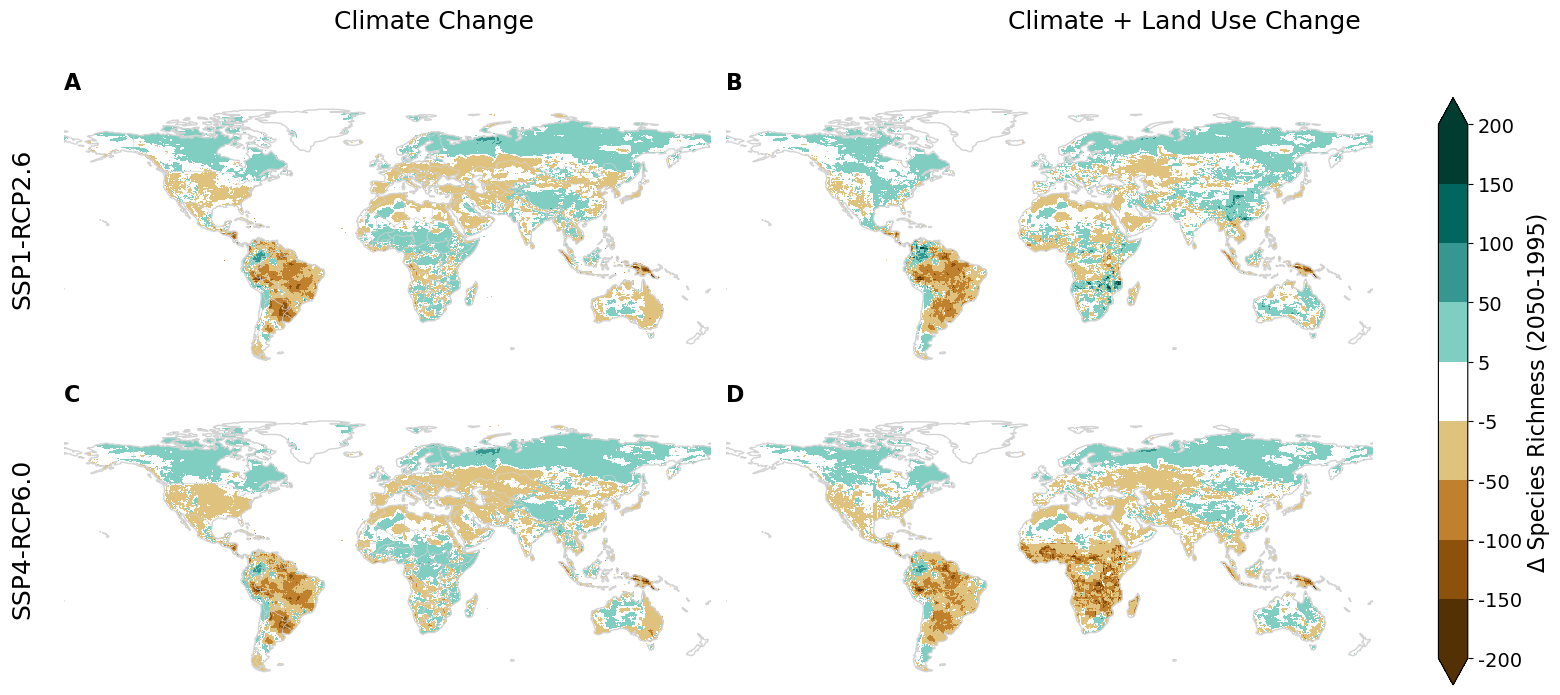

In [6]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050','2052', '2056', '2080', '2100', '2150', '2200', '2250']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
rcp_indices=scenario_indices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = matplotlib.colors.ListedColormap(['white', 'green'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

plot_idx = 0
subplot_labels = ['A', 'B', 'C', 'D']
for scenario in scenarios:
    diff_newvalue = mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]
    diff_sumbin = mean_over_all_sdms_gcms_sumbin_fut[scenario] - mean_over_all_sdms_gcms_sumbin_hist[scenario]
    


# Your existing code ...
    if plot_idx >= len(axes.flatten()):
        break
    ax1 = axes.flatten()[plot_idx]
    ax2 = axes.flatten()[plot_idx + 1]
    labels = [subplot_labels[plot_idx], subplot_labels[plot_idx + 1]]
    
    # Define the colormap and the range of values for the colorbar

    #vmin_b = diff_sum_bin.min().values
    #vmax_b = diff_sum_bin.max().values
    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffff', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850', '#006837'] RdYlGn but white in the middle 

    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#ffffff', '#a6d96a', '#66bd63', '#1a9850', '#006837'] #RdYlGn but white in the middle and only 8 + white
    
    
    #custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#f5f5f5', '#c7eae5', '#80cdc1', '#35978f', '#01665e', '#003c30'] #brown to blue
    custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#ffffff', '#80cdc1', '#35978f', '#01665e', '#003c30' ]
    #custom_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#ffffff', '#c7eae5', '#80cdc1', '#35978f', '#01665e'] # brown to turqois
    cmap = ListedColormap(custom_colors)

    boundaries = [-200, -150, -100, -50,-5,5,50, 100, 150, 200] # Adjust these values according to your data
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im1 = ax1.pcolormesh(diff_newvalue['lon'].values, diff_newvalue['lat'].values, np.where(diff_newvalue.values != 0, diff_newvalue.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax1, color="#ffffff", zorder=1, alpha=0)
   # ax1.set_title(f"Climate Change impact: {year_indices[future_time]} - 1995 for {scenario}",loc='center',fontsize=18 )

    ax1.axis('off')
    ax1.set_extent((-180,180,-63,90))
    ax1.add_feature(cfeature.BORDERS,color='lightgrey',linewidth=0.5)
    ax1.set_title(labels[0],loc='left',weight='bold', fontsize=16)
    
    #ax1.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    ax1.coastlines(color="lightgrey")


    ticks_b = np.array( [-200, -150, -100, -50,0,50, 100, 150, 200])
    tick_labels = [str(int(tick)) for tick in ticks_b]

  
    im2 = ax2.pcolormesh(diff_sumbin['lon'].values, diff_sumbin['lat'].values,  np.where(diff_sumbin.values != 0, diff_sumbin.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax2, color="#ffffff", zorder=1, alpha=0)

    #ax2.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    
   # ax2.set_title(f"{scenario_indices[scenario]}",loc='left',fontsize=18)

    ax2.axis('off')
    ax2.set_extent((-180,180,-63,90))
    ax2.set_title(labels[1],loc='left', weight='bold',fontsize=16)

    ax2.coastlines(color="lightgrey")
   
    # Increase the plot index by 2 to move to the next triplet of subplots
    plot_idx += 2
    

#cbar = plt.colorbar(im2, ax=ax2, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b,extend='both')
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.025, pad=0.05,extend='both')                   
        
cbar.set_label('Δ Species Richness (2050-1995)', fontsize=16)
ticks = np.array([-200, -150, -100, -50, -5,5, 50, 100, 150, 200])
tick_labels = ['-200', '-150', '-100', '-50', '-5', '5','50', '100', '150', '200']

# Setzen Sie die Ticks und Tick-Labels für die Farbleiste
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
cbar.ax.tick_params(labelsize=14)

fig.text(0.75, 0.85, 'Climate + Land Use Change', ha='center', fontsize=18)


# After your plotting loop
fig.text(-0.025, 0.65, f"{scenario_indices['rcp26']}", va='center', ha='center', rotation='vertical', fontsize=18)
fig.text(-0.025, 0.34, f"{scenario_indices['rcp60']}", va='center', ha='center', rotation='vertical', fontsize=18)


set_plot_param()
# "Climate Change" über den linken oberen Subplot
fig.text(0.25, 0.85, 'Climate Change', ha='center', fontsize=18)

plt.savefig("/storage/homefs/ch21o450/scripts/all_figures/FigS2.1.png", dpi=300, bbox_inches='tight')
plt.show()

# Figure S2: Relative differences 2080 

In [27]:

import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Displaying the created weights fo
# Specify the output directory
output_dir = "/storage/workspaces/wa_climate/climate_trt/chari/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals","Bird","Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    


    for sdm in sdms:
        mean_newvalue_hist[scenario][sdm] = {}
        mean_newvalue_fut[scenario][sdm] = {}
        mean_sumbin_hist[scenario][sdm] = {}
        mean_sumbin_fut[scenario][sdm] = {}
        
        dataarrays_newvalue_hist = []
        dataarrays_newvalue_fut = []
        dataarrays_sumbin_hist = []
        dataarrays_sumbin_fut = []

        for gcm in gcms:
            mean_newvalue_hist[scenario][sdm][gcm] = {}
            mean_newvalue_fut[scenario][sdm][gcm] = {}
            mean_sumbin_hist[scenario][sdm][gcm] = {}
            mean_sumbin_fut[scenario][sdm][gcm] = {}
            
            sum_newvalue_hist = None
            sum_newvalue_future = None
            sum_sumbin_hist = None
            sum_sumbin_future = None

            for taxa in taxas:
                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4_newbase.pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4_newbase.pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa = pickle.load(f)

     # Sum across taxa
                if sum_newvalue_hist is None:
                    sum_newvalue_hist = newvalue_hist_taxa
                    sum_newvalue_future = newvalue_future_taxa
                    sum_sumbin_hist = sum_bin_hist_taxa
                    sum_sumbin_future = sum_bin_future_taxa
                else:
                    sum_newvalue_hist += newvalue_hist_taxa
                    sum_newvalue_future += newvalue_future_taxa
                    sum_sumbin_hist += sum_bin_hist_taxa
                    sum_sumbin_future += sum_bin_future_taxa
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                    
            # Assign the summed values to your dictionary
            mean_newvalue_hist[scenario][sdm][gcm] = sum_newvalue_hist
            mean_newvalue_fut[scenario][sdm][gcm] = sum_newvalue_future
            mean_sumbin_hist[scenario][sdm][gcm] = sum_sumbin_hist
            mean_sumbin_fut[scenario][sdm][gcm] = sum_sumbin_future

            dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][sdm][gcm])
            dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][sdm][gcm])
            dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][sdm][gcm])
            dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][sdm][gcm])

        # Concatenate and calculate the mean over the new dimension
        mean_over_sdms_gcms_hist[scenario][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').mean(dim='gcm')
        mean_over_sdms_gcms_fut[scenario][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_hist[scenario][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_fut[scenario][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').mean(dim='gcm')

               # Append the mean DataArrays across GCMs to the SDM lists
        dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][sdm])
        dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][sdm])
        dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][sdm])
        dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][sdm])

    # Concatenate and calculate the mean over SDMs
    mean_over_all_sdms_gcms_hist[scenario] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').mean(dim='sdm')
    mean_over_all_sdms_gcms_fut[scenario] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').mean(dim='sdm') 
    

/scratch/local/16563686/ipykernel_4171137/3296546328.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


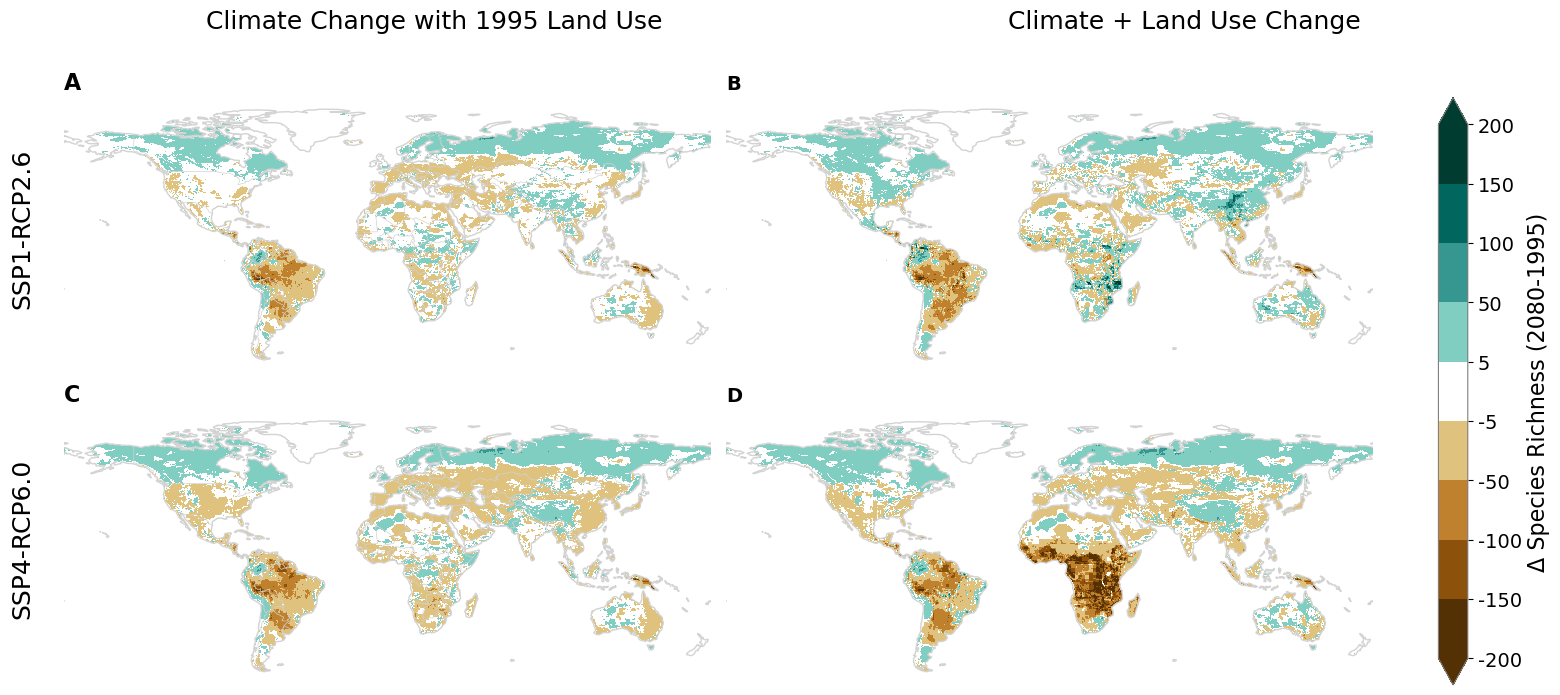

In [28]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050','2052', '2056', '2080', '2100', '2150', '2200', '2250']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
rcp_indices=scenario_indices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = matplotlib.colors.ListedColormap(['white', 'green'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

plot_idx = 0
subplot_labels = ['A', 'B','C','D']
for scenario in scenarios:
    diff_newvalue = mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]
    diff_sumbin = mean_over_all_sdms_gcms_sumbin_fut[scenario] - mean_over_all_sdms_gcms_sumbin_hist[scenario]
    


# Your existing code ...
    if plot_idx >= len(axes.flatten()):
        break
    ax1 = axes.flatten()[plot_idx]
    ax2 = axes.flatten()[plot_idx + 1]
    labels = [subplot_labels[plot_idx], subplot_labels[plot_idx + 1]]
    
    # Define the colormap and the range of values for the colorbar

    #vmin_b = diff_sum_bin.min().values
    #vmax_b = diff_sum_bin.max().values
    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffff', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850', '#006837'] RdYlGn but white in the middle 

    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#ffffff', '#a6d96a', '#66bd63', '#1a9850', '#006837'] #RdYlGn but white in the middle and only 8 + white
    
    
    #custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#f5f5f5', '#c7eae5', '#80cdc1', '#35978f', '#01665e', '#003c30'] #brown to blue
    custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#ffffff', '#80cdc1', '#35978f', '#01665e', '#003c30' ]
    #custom_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#ffffff', '#c7eae5', '#80cdc1', '#35978f', '#01665e'] # brown to turqois
    cmap = ListedColormap(custom_colors)

    boundaries = [-200, -150, -100, -50,-5,5,50, 100, 150, 200] # Adjust these values according to your data
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im1 = ax1.pcolormesh(diff_newvalue['lon'].values, diff_newvalue['lat'].values, np.where(diff_newvalue.values != 0, diff_newvalue.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax1, color="#ffffff", zorder=1, alpha=0)
   # ax1.set_title(f"Climate Change impact: {year_indices[future_time]} - 1995 for {scenario}",loc='center',fontsize=18 )

    ax1.axis('off')
    ax1.set_extent((-180,180,-63,90))
    ax1.add_feature(cfeature.BORDERS,color='lightgrey',linewidth=0.5)
    ax1.set_title(labels[0],loc='left',weight='bold', fontsize=16)
    
    #ax1.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    ax1.coastlines(color="lightgrey")


    ticks_b = np.array( [-200, -150, -100, -50,0,50, 100, 150, 200])
    tick_labels = [str(int(tick)) for tick in ticks_b]

  
    im2 = ax2.pcolormesh(diff_sumbin['lon'].values, diff_sumbin['lat'].values,  np.where(diff_sumbin.values != 0, diff_sumbin.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax2, color="#ffffff", zorder=1, alpha=0)

    #ax2.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    
    ax2.set_title(f"{scenario_indices[scenario]}",loc='left',fontsize=18)

    ax2.axis('off')
    ax2.set_extent((-180,180,-63,90))
    ax2.set_title(labels[1],loc='left', weight='bold',fontsize=14)

    ax2.coastlines(color="lightgrey")
   
    # Increase the plot index by 2 to move to the next triplet of subplots
    plot_idx += 2
    

#cbar = plt.colorbar(im2, ax=ax2, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b,extend='both')
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.025, pad=0.05,extend='both')                   
        
cbar.set_label('Δ Species Richness (2080-1995)', fontsize=16)
ticks = np.array([-200, -150, -100, -50, -5,5, 50, 100, 150, 200])
tick_labels = ['-200', '-150', '-100', '-50', '-5', '5','50', '100', '150', '200']

# Setzen Sie die Ticks und Tick-Labels für die Farbleiste
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
cbar.ax.tick_params(labelsize=14)

fig.text(0.75, 0.85, 'Climate + Land Use Change', ha='center', fontsize=18)


# After your plotting loop
fig.text(-0.025, 0.65, f"{scenario_indices['rcp26']}", va='center', ha='center', rotation='vertical', fontsize=18)
fig.text(-0.025, 0.34, f"{scenario_indices['rcp60']}", va='center', ha='center', rotation='vertical', fontsize=18)


set_plot_param()
# "Climate Change" über den linken oberen Subplot
fig.text(0.25, 0.85, 'Climate Change with 1995 Land Use', ha='center', fontsize=18)

plt.savefig("/storage/homefs/ch21o450/scripts/all_figures/FigS2.8.png", dpi=300, bbox_inches='tight')
plt.show()

/scratch/local/16558674/ipykernel_1961608/1268200037.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


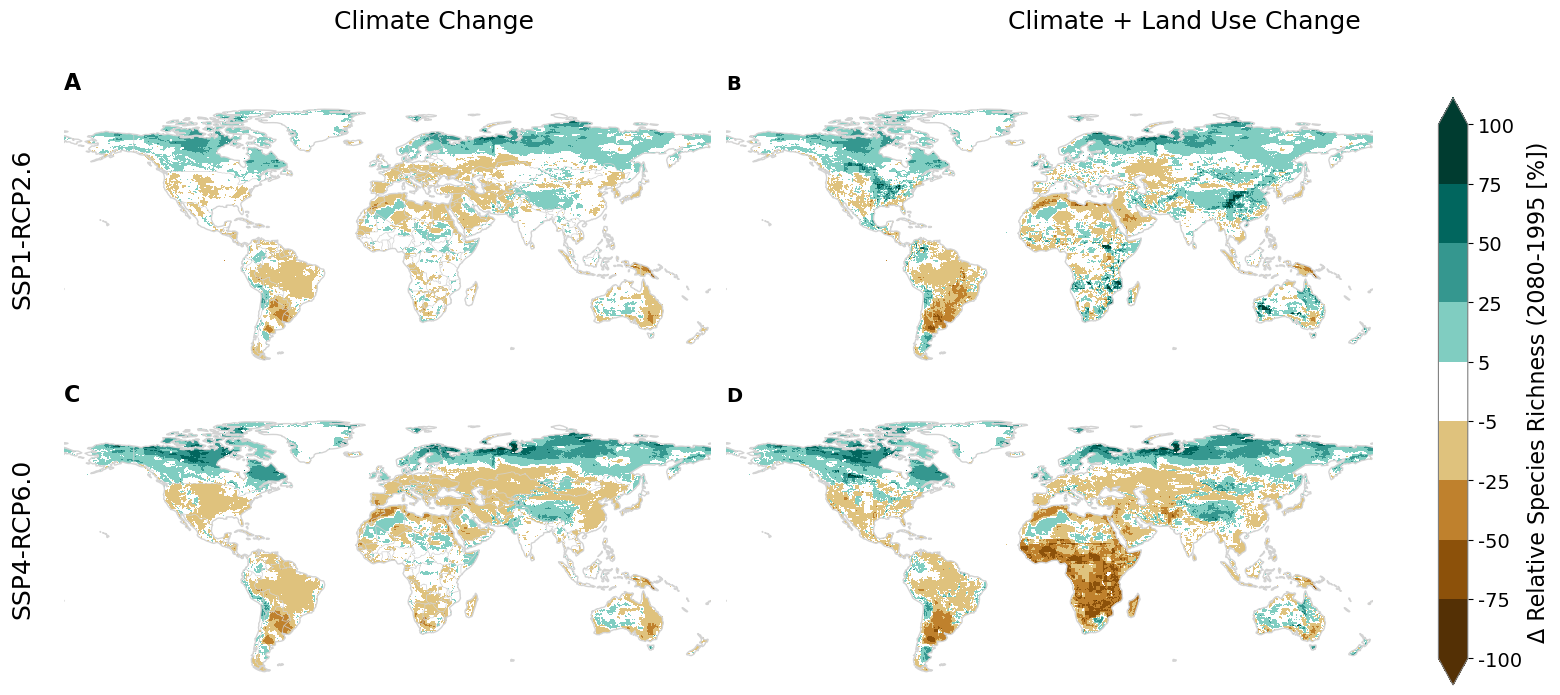

In [6]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050','2052', '2056', '2080', '2100', '2150', '2200', '2250']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
rcp_indices=scenario_indices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = matplotlib.colors.ListedColormap(['white', 'green'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

plot_idx = 0
subplot_labels = ['A', 'B', 'C', 'D']

for scenario in scenarios:
    # Calculate relative difference avoiding division by zero
    
    diff_newvalue = xr.where(mean_over_all_sdms_gcms_hist[scenario] != 0, (mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]) / mean_over_all_sdms_gcms_hist[scenario] * 100, 0)
    #diff_newvalue =  (mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]) / mean_over_all_sdms_gcms_hist[scenario] * 100

    diff_sumbin=  xr.where(mean_over_all_sdms_gcms_sumbin_hist[scenario] != 0, (mean_over_all_sdms_gcms_sumbin_fut[scenario]  - mean_over_all_sdms_gcms_sumbin_hist[scenario]) / mean_over_all_sdms_gcms_sumbin_hist[scenario] * 100, 0)
    #diff_sumbin=   (mean_over_all_sdms_gcms_sumbin_fut[scenario]  - mean_over_all_sdms_gcms_sumbin_hist[scenario]) / mean_over_all_sdms_gcms_sumbin_hist[scenario] * 100
    

    if plot_idx >= len(axes.flatten()):
        break
    ax1 = axes.flatten()[plot_idx]
    ax2 = axes.flatten()[plot_idx + 1]
    labels = [subplot_labels[plot_idx], subplot_labels[plot_idx + 1]]
    
    # Define the colormap and the range of values for the colorbar

    #vmin_b = diff_sum_bin.min().values
    #vmax_b = diff_sum_bin.max().values
    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffff', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850', '#006837'] RdYlGn but white in the middle 

    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#ffffff', '#a6d96a', '#66bd63', '#1a9850', '#006837'] #RdYlGn but white in the middle and only 8 + white
    
    
    #custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#f5f5f5', '#c7eae5', '#80cdc1', '#35978f', '#01665e', '#003c30'] #brown to blue
    custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#ffffff', '#80cdc1', '#35978f', '#01665e', '#003c30' ]
    #custom_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#ffffff', '#c7eae5', '#80cdc1', '#35978f', '#01665e'] # brown to turqois
    cmap = ListedColormap(custom_colors)

    boundaries =[-100, -75, -50, -25,-5, 5, 25, 50, 75, 100] # Adjust these values according to your data
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im1 = ax1.pcolormesh(diff_newvalue['lon'].values, diff_newvalue['lat'].values, np.where(diff_newvalue.values != 0, diff_newvalue.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax1, color="#ffffff", zorder=1, alpha=0)
   # ax1.set_title(f"Climate Change impact: {year_indices[future_time]} - 1995 for {scenario}",loc='center',fontsize=18 )

    ax1.axis('off')
    ax1.set_extent((-180,180,-63,90))
    ax1.add_feature(cfeature.BORDERS,color='lightgrey',linewidth=0.5)
    ax1.set_title(labels[0],loc='left',weight='bold', fontsize=16)
    
    #ax1.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    ax1.coastlines(color="lightgrey")
 


    ticks_b = np.array( [-100, -75, -50, -25, -5,5, 25, 50, 75, 100])
    tick_labels = [str(int(tick)) for tick in ticks_b]

  
    im2 = ax2.pcolormesh(diff_sumbin['lon'].values, diff_sumbin['lat'].values,  np.where(diff_sumbin.values != 0, diff_sumbin.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
    
    countries.plot(ax=ax2, color="#ffffff", zorder=1, alpha=0)

    #ax2.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    
   # ax2.set_title(f"{scenario_indices[scenario]}",loc='left',fontsize=18)

    ax2.axis('off')
    ax2.set_extent((-180,180,-63,90))
    ax2.set_title(labels[1],loc='left', weight='bold',fontsize=14)

    ax2.coastlines(color="lightgrey")
   
    # Increase the plot index by 2 to move to the next triplet of subplots
    plot_idx += 2

#cbar = plt.colorbar(im2, ax=ax2, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b,extend='both')
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.025, pad=0.05,extend='both') 
cbar.set_label('Δ Relative Species Richness (2080-1995 [%])', fontsize=16)
ticks = np.array([-100, -75, -50, -25, -5,5, 25, 50, 75, 100])
tick_labels = ['-100', '-75', '-50', '-25', '-5','5' ,'25', '50', '75', '100']

# Setzen Sie die Ticks und Tick-Labels für die Farbleiste
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
cbar.ax.tick_params(labelsize=14)

fig.text(0.75, 0.85, 'Climate + Land Use Change', ha='center', fontsize=18)

set_plot_param()
# "Climate Change" über den linken oberen Subplot
fig.text(0.25, 0.85, 'Climate Change', ha='center', fontsize=18)

# After your plotting loop
fig.text(-0.025, 0.65, f"{scenario_indices['rcp26']}", va='center', ha='center', rotation='vertical', fontsize=18)
fig.text(-0.025, 0.34, f"{scenario_indices['rcp60']}", va='center', ha='center', rotation='vertical', fontsize=18)

# Show or save the plot
plt.savefig("/storage/homefs/ch21o450/scripts/all_figures/Fig.2.3.png", dpi=300, bbox_inches='tight')
plt.show()

# Figure S3: Absolute change 2080-1995 Land use only 

In [10]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Displaying the created weights fo
# Specify the output directory
output_dir = "/storage/workspaces/wa_climate/climate_trt/chari/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals","Bird","Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    


    for sdm in sdms:
        mean_newvalue_hist[scenario][sdm] = {}
        mean_newvalue_fut[scenario][sdm] = {}
        mean_sumbin_hist[scenario][sdm] = {}
        mean_sumbin_fut[scenario][sdm] = {}
        
        dataarrays_newvalue_hist = []
        dataarrays_newvalue_fut = []
        dataarrays_sumbin_hist = []
        dataarrays_sumbin_fut = []

        for gcm in gcms:
            mean_newvalue_hist[scenario][sdm][gcm] = {}
            mean_newvalue_fut[scenario][sdm][gcm] = {}
            mean_sumbin_hist[scenario][sdm][gcm] = {}
            mean_sumbin_fut[scenario][sdm][gcm] = {}
            
            sum_newvalue_hist = None
            sum_newvalue_future = None
            sum_sumbin_hist = None
            sum_sumbin_future = None

            for taxa in taxas:
                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4_newbase.pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4_newbase.pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")


                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa = pickle.load(f)

     # Sum across taxa
                if sum_newvalue_hist is None:
                    sum_newvalue_hist = newvalue_hist_taxa
                    sum_newvalue_future = newvalue_future_taxa
                    sum_sumbin_hist = sum_bin_hist_taxa
                    sum_sumbin_future = sum_bin_future_taxa
                else:
                    sum_newvalue_hist += newvalue_hist_taxa
                    sum_newvalue_future += newvalue_future_taxa
                    sum_sumbin_hist += sum_bin_hist_taxa
                    sum_sumbin_future += sum_bin_future_taxa
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                    
            # Assign the summed values to your dictionary
            mean_newvalue_hist[scenario][sdm][gcm] = sum_newvalue_hist
            mean_newvalue_fut[scenario][sdm][gcm] = sum_newvalue_future
            mean_sumbin_hist[scenario][sdm][gcm] = sum_sumbin_hist
            mean_sumbin_fut[scenario][sdm][gcm] = sum_sumbin_future

            dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][sdm][gcm])
            dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][sdm][gcm])
            dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][sdm][gcm])
            dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][sdm][gcm])

        # Concatenate and calculate the mean over the new dimension
        mean_over_sdms_gcms_hist[scenario][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_fut[scenario][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_hist[scenario][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_fut[scenario][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')

               # Append the mean DataArrays across GCMs to the SDM lists
        dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][sdm])
        dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][sdm])
        dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][sdm])
        dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][sdm])

    # Concatenate and calculate the mean over SDMs
    mean_over_all_sdms_gcms_hist[scenario] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_fut[scenario] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm') 
    

/scratch/local/16563686/ipykernel_4171137/3761931900.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


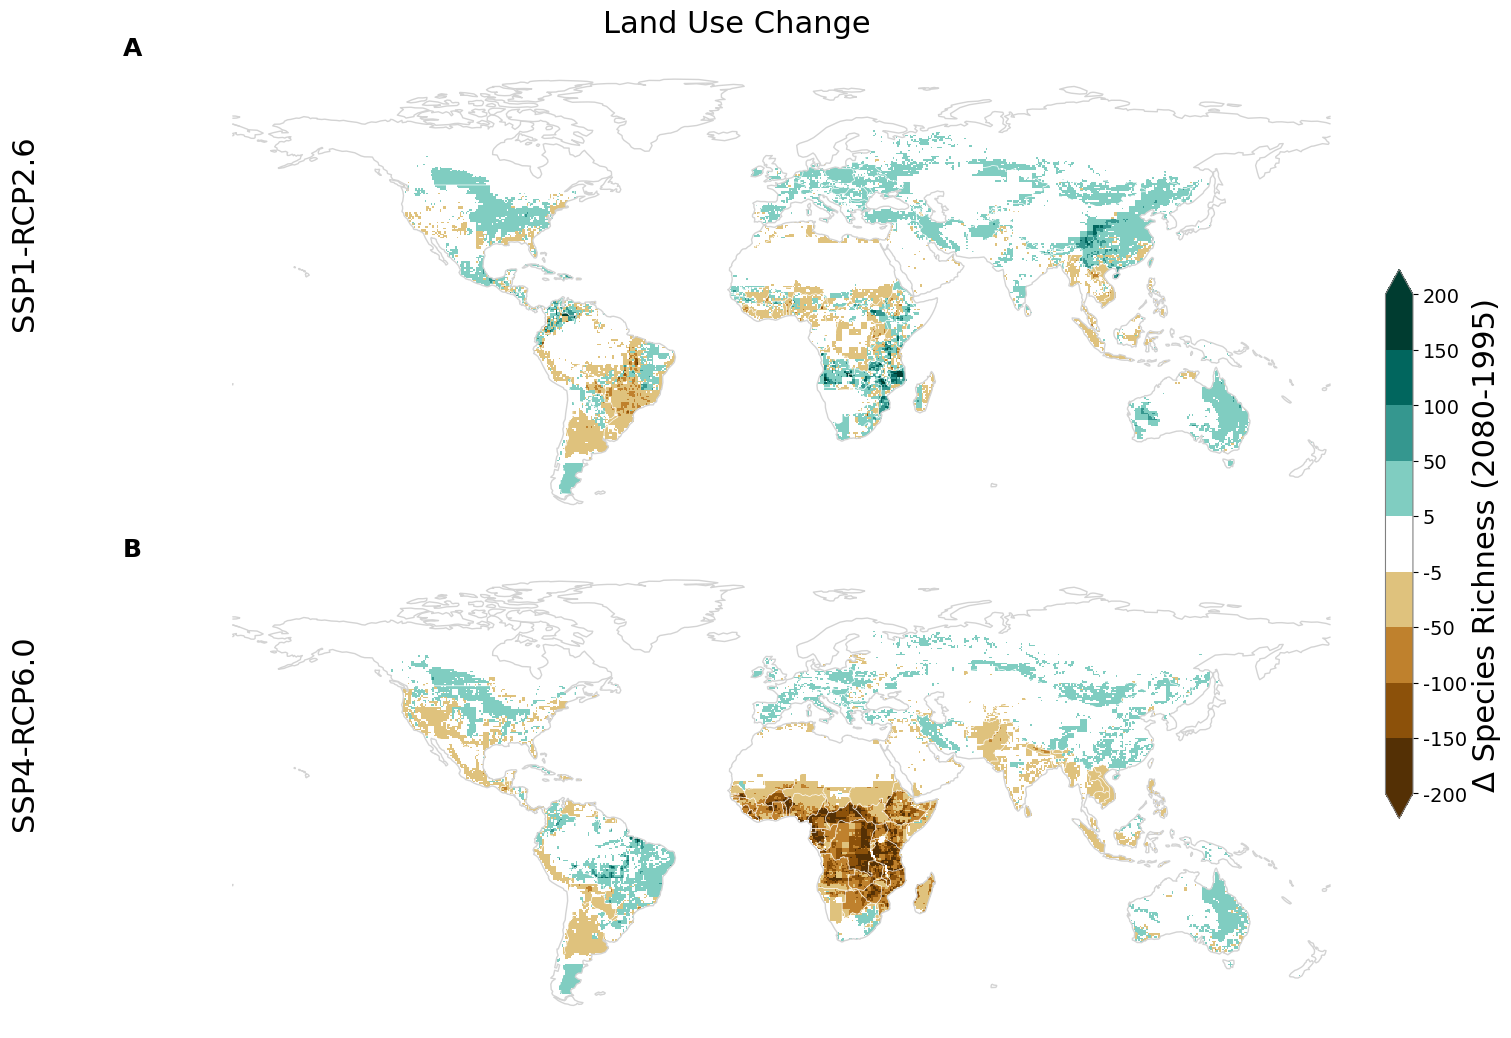

In [18]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

set_plot_param()
scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050','2052', '2056', '2080', '2100', '2150', '2200', '2250']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
rcp_indices=scenario_indices
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = matplotlib.colors.ListedColormap(['white', 'green'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

plot_idx = 0
subplot_labels = ['A', 'B']
for scenario in scenarios:
    diff_newvalue = mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]
    diff_sumbin = mean_over_all_sdms_gcms_sumbin_fut[scenario] - mean_over_all_sdms_gcms_sumbin_hist[scenario]
    
    lu_only = diff_sumbin - diff_newvalue
    


# Your existing code ...
    if plot_idx >= len(axes.flatten()):
        break
    ax1 = axes.flatten()[plot_idx]
    labels = [subplot_labels[plot_idx]]
    

    custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#ffffff', '#80cdc1', '#35978f', '#01665e', '#003c30' ]
    #custom_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#ffffff', '#c7eae5', '#80cdc1', '#35978f', '#01665e'] # brown to turqois
    cmap = ListedColormap(custom_colors)

    boundaries = [-200, -150, -100, -50,-5,5,50, 100, 150, 200] # Adjust these values according to your data
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im1 = ax1.pcolormesh(lu_only['lon'].values, lu_only['lat'].values, np.where(lu_only.values != 0, lu_only.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
   

    countries.plot(ax=ax1, color="lightgrey", zorder=1, alpha=00)
   # ax1.set_title(f"Climate Change impact: {year_indices[future_time]} - 1995 for {scenario}",loc='center',fontsize=18 )

    ax1.axis('off')
    ax1.set_extent((-180,180,-63,90))
    ax1.add_feature(cfeature.BORDERS,color='white',linewidth=0.5)
    # Add subplot labels (A, B) at the top-left of each subplot
    ax1.text(-0.1, 1.05, subplot_labels[plot_idx], transform=ax1.transAxes,
             fontsize=18, fontweight='bold', va='top', ha='left')
    
        
    ax1.coastlines(color="lightgrey")



    countries.plot(ax=ax2, color="lightgrey", zorder=1, alpha=0.3)

    # Increase the plot index by 2 to move to the next triplet of subplots
    plot_idx += 1
    
# Set up the color map and boundaries
custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#ffffff', '#80cdc1', '#35978f', '#01665e', '#003c30']
cmap = ListedColormap(custom_colors)
boundaries = [-200, -150, -100, -50, -5, 5, 50, 100, 150, 200]  # Adjust these values according to your data
norm = BoundaryNorm(boundaries, cmap.N)

# Plot the data with the color map and normalization
im1 = ax1.pcolormesh(
    lu_only['lon'].values, lu_only['lat'].values,
    np.where(lu_only.values != 0, lu_only.values, np.nan),
    transform=ccrs.PlateCarree(), cmap=cmap, norm=norm
)

# Colorbar setup with the second axis handle
cbar = fig.colorbar(im1, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.025, pad=0.05, extend='both')
cbar.set_label('Δ Species Richness (2080-1995)', fontsize=22)

# Set ticks and labels for the color bar
ticks = np.array([-200, -150, -100, -50, -5, 5, 50, 100, 150, 200])
tick_labels = ['-200', '-150', '-100', '-50', '-5', '5', '50', '100', '150', '200']
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)




# After your plotting loop
fig.text(-0.025, 0.8, f"{scenario_indices['rcp26']}", va='center', ha='center', rotation='vertical', fontsize=22)
fig.text(-0.025, 0.3, f"{scenario_indices['rcp60']}", va='center', ha='center', rotation='vertical', fontsize=22)


# "Climate Change" über den linken oberen Subplot
fig.text(0.45, 1, 'Land Use Change', ha='center', fontsize=22)
set_plot_param()
#fig.text(0.5, 0.9, 'Amphibians', ha='center', fontsize=18)

# Show or save the plot

plt.savefig("/storage/homefs/ch21o450/scripts/all_figures/Fig.S2.4.png", dpi=300, bbox_inches='tight')
plt.show()

# Figure S4: Absolute change 2080-1995 Mammals only

In [25]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Displaying the created weights fo
# Specify the output directory
output_dir = "/storage/workspaces/wa_climate/climate_trt/chari/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    


    for sdm in sdms:
        mean_newvalue_hist[scenario][sdm] = {}
        mean_newvalue_fut[scenario][sdm] = {}
        mean_sumbin_hist[scenario][sdm] = {}
        mean_sumbin_fut[scenario][sdm] = {}
        
        dataarrays_newvalue_hist = []
        dataarrays_newvalue_fut = []
        dataarrays_sumbin_hist = []
        dataarrays_sumbin_fut = []

        for gcm in gcms:
            mean_newvalue_hist[scenario][sdm][gcm] = {}
            mean_newvalue_fut[scenario][sdm][gcm] = {}
            mean_sumbin_hist[scenario][sdm][gcm] = {}
            mean_sumbin_fut[scenario][sdm][gcm] = {}
            
            sum_newvalue_hist = None
            sum_newvalue_future = None
            sum_sumbin_hist = None
            sum_sumbin_future = None

            for taxa in taxas:
                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4_newbase.pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4_newbase.pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa = pickle.load(f)

     # Sum across taxa
                if sum_newvalue_hist is None:
                    sum_newvalue_hist = newvalue_hist_taxa
                    sum_newvalue_future = newvalue_future_taxa
                    sum_sumbin_hist = sum_bin_hist_taxa
                    sum_sumbin_future = sum_bin_future_taxa
                else:
                    sum_newvalue_hist += newvalue_hist_taxa
                    sum_newvalue_future += newvalue_future_taxa
                    sum_sumbin_hist += sum_bin_hist_taxa
                    sum_sumbin_future += sum_bin_future_taxa
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                    
            # Assign the summed values to your dictionary
            mean_newvalue_hist[scenario][sdm][gcm] = sum_newvalue_hist
            mean_newvalue_fut[scenario][sdm][gcm] = sum_newvalue_future
            mean_sumbin_hist[scenario][sdm][gcm] = sum_sumbin_hist
            mean_sumbin_fut[scenario][sdm][gcm] = sum_sumbin_future

            dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][sdm][gcm])
            dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][sdm][gcm])
            dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][sdm][gcm])
            dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][sdm][gcm])

        # Concatenate and calculate the mean over the new dimension
        mean_over_sdms_gcms_hist[scenario][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_fut[scenario][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_hist[scenario][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_fut[scenario][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')

               # Append the mean DataArrays across GCMs to the SDM lists
        dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][sdm])
        dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][sdm])
        dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][sdm])
        dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][sdm])

    # Concatenate and calculate the mean over SDMs
    mean_over_all_sdms_gcms_hist[scenario] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_fut[scenario] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm') 
    

/scratch/local/16563686/ipykernel_4171137/462784786.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


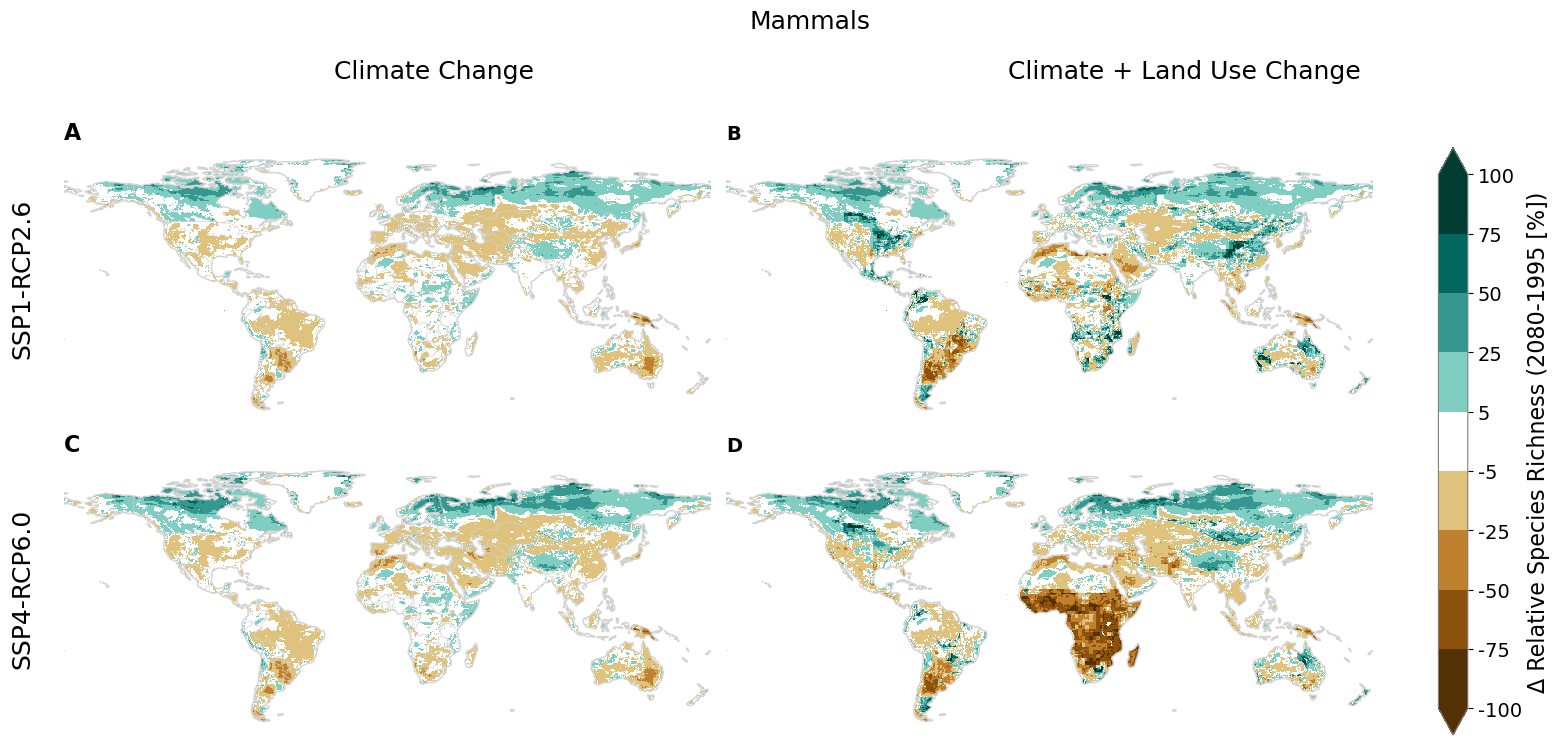

In [26]:
#relative
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050','2052', '2056', '2080', '2100', '2150', '2200', '2250']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
rcp_indices=scenario_indices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = matplotlib.colors.ListedColormap(['white', 'green'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

plot_idx = 0
subplot_labels = ['A', 'B', 'C', 'D']

for scenario in scenarios:
    # Calculate relative difference avoiding division by zero
    
    diff_newvalue = xr.where(mean_over_all_sdms_gcms_hist[scenario] != 0, (mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]) / mean_over_all_sdms_gcms_hist[scenario] * 100, 0)
    #diff_newvalue =  (mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]) / mean_over_all_sdms_gcms_hist[scenario] * 100

    diff_sumbin=  xr.where(mean_over_all_sdms_gcms_sumbin_hist[scenario] != 0, (mean_over_all_sdms_gcms_sumbin_fut[scenario]  - mean_over_all_sdms_gcms_sumbin_hist[scenario]) / mean_over_all_sdms_gcms_sumbin_hist[scenario] * 100, 0)
    #diff_sumbin=   (mean_over_all_sdms_gcms_sumbin_fut[scenario]  - mean_over_all_sdms_gcms_sumbin_hist[scenario]) / mean_over_all_sdms_gcms_sumbin_hist[scenario] * 100
    

    if plot_idx >= len(axes.flatten()):
        break
    ax1 = axes.flatten()[plot_idx]
    ax2 = axes.flatten()[plot_idx + 1]
    labels = [subplot_labels[plot_idx], subplot_labels[plot_idx + 1]]
    
    # Define the colormap and the range of values for the colorbar

    #vmin_b = diff_sum_bin.min().values
    #vmax_b = diff_sum_bin.max().values
    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffff', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850', '#006837'] RdYlGn but white in the middle 

    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#ffffff', '#a6d96a', '#66bd63', '#1a9850', '#006837'] #RdYlGn but white in the middle and only 8 + white
    
    
    #custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#f5f5f5', '#c7eae5', '#80cdc1', '#35978f', '#01665e', '#003c30'] #brown to blue
    custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#ffffff', '#80cdc1', '#35978f', '#01665e', '#003c30' ]
    #custom_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#ffffff', '#c7eae5', '#80cdc1', '#35978f', '#01665e'] # brown to turqois
    cmap = ListedColormap(custom_colors)

    boundaries =[-100, -75, -50, -25,-5, 5, 25, 50, 75, 100] # Adjust these values according to your data
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im1 = ax1.pcolormesh(diff_newvalue['lon'].values, diff_newvalue['lat'].values, np.where(diff_newvalue.values != 0, diff_newvalue.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax1, color="#ffffff", zorder=1, alpha=0)
   # ax1.set_title(f"Climate Change impact: {year_indices[future_time]} - 1995 for {scenario}",loc='center',fontsize=18 )

    ax1.axis('off')
    ax1.set_extent((-180,180,-63,90))
    ax1.add_feature(cfeature.BORDERS,color='lightgrey',linewidth=0.5)
    ax1.set_title(labels[0],loc='left',weight='bold', fontsize=16)
    
    #ax1.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    ax1.coastlines(color="lightgrey")
 


    ticks_b = np.array( [-100, -75, -50, -25, -5,5, 25, 50, 75, 100])
    tick_labels = [str(int(tick)) for tick in ticks_b]

  
    im2 = ax2.pcolormesh(diff_sumbin['lon'].values, diff_sumbin['lat'].values,  np.where(diff_sumbin.values != 0, diff_sumbin.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
    
    countries.plot(ax=ax2, color="#ffffff", zorder=1, alpha=0)

    #ax2.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    
   # ax2.set_title(f"{scenario_indices[scenario]}",loc='left',fontsize=18)

    ax2.axis('off')
    ax2.set_extent((-180,180,-63,90))
    ax2.set_title(labels[1],loc='left', weight='bold',fontsize=14)

    ax2.coastlines(color="lightgrey")
   
    # Increase the plot index by 2 to move to the next triplet of subplots
    plot_idx += 2

#cbar = plt.colorbar(im2, ax=ax2, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b,extend='both')
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.025, pad=0.05,extend='both') 
cbar.set_label('Δ Relative Species Richness (2080-1995 [%])', fontsize=16)
ticks = np.array([-100, -75, -50, -25, -5,5, 25, 50, 75, 100])
tick_labels = ['-100', '-75', '-50', '-25', '-5','5' ,'25', '50', '75', '100']

# Setzen Sie die Ticks und Tick-Labels für die Farbleiste
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
cbar.ax.tick_params(labelsize=14)

fig.text(0.75, 0.85, 'Climate + Land Use Change', ha='center', fontsize=18)

set_plot_param()
# "Climate Change" über den linken oberen Subplot
fig.text(0.25, 0.85, 'Climate Change', ha='center', fontsize=18)
fig.text(0.5, 0.9, 'Mammals', ha='center', fontsize=18)

# After your plotting loop
fig.text(-0.025, 0.65, f"{scenario_indices['rcp26']}", va='center', ha='center', rotation='vertical', fontsize=18)
fig.text(-0.025, 0.34, f"{scenario_indices['rcp60']}", va='center', ha='center', rotation='vertical', fontsize=18)

# Show or save the plot
plt.savefig("/storage/homefs/ch21o450/scripts/all_figures/Fig.S2.7.png", dpi=300, bbox_inches='tight')
plt.show()

/scratch/local/8994632/ipykernel_2908423/1447510516.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


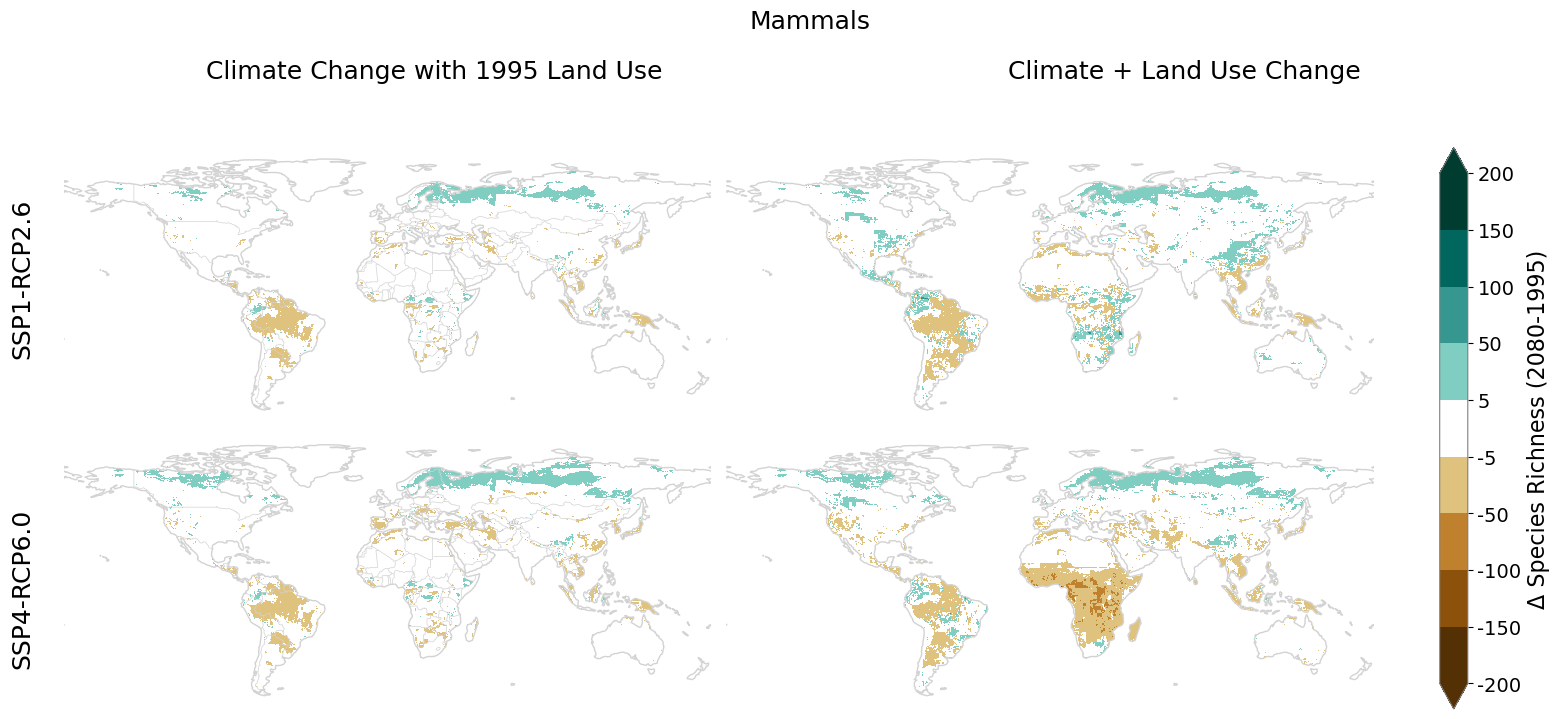

In [18]:
#absolute
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050','2052', '2056', '2080', '2100', '2150', '2200', '2250']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
rcp_indices=scenario_indices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = matplotlib.colors.ListedColormap(['white', 'green'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

plot_idx = 0
subplot_labels = ['a)', 'b)','c)','d)']
for scenario in scenarios:
    diff_newvalue = mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]
    diff_sumbin = mean_over_all_sdms_gcms_sumbin_fut[scenario] - mean_over_all_sdms_gcms_sumbin_hist[scenario]
    


# Your existing code ...
    if plot_idx >= len(axes.flatten()):
        break
    ax1 = axes.flatten()[plot_idx]
    ax2 = axes.flatten()[plot_idx + 1]
    labels = [subplot_labels[plot_idx], subplot_labels[plot_idx + 1]]
    
    # Define the colormap and the range of values for the colorbar

    #vmin_b = diff_sum_bin.min().values
    #vmax_b = diff_sum_bin.max().values
    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffff', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850', '#006837'] RdYlGn but white in the middle 

    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#ffffff', '#a6d96a', '#66bd63', '#1a9850', '#006837'] #RdYlGn but white in the middle and only 8 + white
    
    
    #custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#f5f5f5', '#c7eae5', '#80cdc1', '#35978f', '#01665e', '#003c30'] #brown to blue
    custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#ffffff', '#80cdc1', '#35978f', '#01665e', '#003c30' ]
    #custom_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#ffffff', '#c7eae5', '#80cdc1', '#35978f', '#01665e'] # brown to turqois
    cmap = ListedColormap(custom_colors)

    boundaries = [-200, -150, -100, -50,-5,5,50, 100, 150, 200] # Adjust these values according to your data
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im1 = ax1.pcolormesh(diff_newvalue['lon'].values, diff_newvalue['lat'].values, np.where(diff_newvalue.values != 0, diff_newvalue.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax1, color="#ffffff", zorder=1, alpha=0)
   # ax1.set_title(f"Climate Change impact: {year_indices[future_time]} - 1995 for {scenario}",loc='center',fontsize=18 )

    ax1.axis('off')
    ax1.set_extent((-180,180,-63,90))
    ax1.add_feature(cfeature.BORDERS,color='lightgrey',linewidth=0.5)
   # ax1.set_title(labels[0],loc='left',weight='bold', fontsize=16)
    
    #ax1.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    ax1.coastlines(color="lightgrey")


    ticks_b = np.array( [-200, -150, -100, -50,0,50, 100, 150, 200])
    tick_labels = [str(int(tick)) for tick in ticks_b]

  
    im2 = ax2.pcolormesh(diff_sumbin['lon'].values, diff_sumbin['lat'].values,  np.where(diff_sumbin.values != 0, diff_sumbin.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax2, color="#ffffff", zorder=1, alpha=0)

    #ax2.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    
   # ax2.set_title(f"{scenario_indices[scenario]}",loc='left',fontsize=18)

    ax2.axis('off')
    ax2.set_extent((-180,180,-63,90))
  #  ax2.set_title(labels[1],loc='left', weight='bold',fontsize=14)

    ax2.coastlines(color="lightgrey")
   
    # Increase the plot index by 2 to move to the next triplet of subplots
    plot_idx += 2
    

#cbar = plt.colorbar(im2, ax=ax2, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b,extend='both')
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.025, pad=0.05,extend='both')                   
        
cbar.set_label('Δ Species Richness (2080-1995)', fontsize=16)
ticks = np.array([-200, -150, -100, -50, -5,5, 50, 100, 150, 200])
tick_labels = ['-200', '-150', '-100', '-50', '-5', '5','50', '100', '150', '200']

# Setzen Sie die Ticks und Tick-Labels für die Farbleiste
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
cbar.ax.tick_params(labelsize=14)

fig.text(0.75, 0.85, 'Climate + Land Use Change', ha='center', fontsize=18)


# After your plotting loop
fig.text(-0.025, 0.65, f"{scenario_indices['rcp26']}", va='center', ha='center', rotation='vertical', fontsize=18)
fig.text(-0.025, 0.34, f"{scenario_indices['rcp60']}", va='center', ha='center', rotation='vertical', fontsize=18)


set_plot_param()
# "Climate Change" über den linken oberen Subplot
fig.text(0.25, 0.85, 'Climate Change with 1995 Land Use', ha='center', fontsize=18)
fig.text(0.5, 0.9, 'Mammals', ha='center', fontsize=18)
#fig.text(0.5, 0.9, 'Amphibians', ha='center', fontsize=18)

# Show or save the plot

plt.savefig("/storage/homefs/ch21o450/scripts/climate_Hari_etal_inprep/functions/figures/main_figures/Figure_S5.png")
plt.show()

# Figure S5: Absolute change 2080-1995 Birds only

In [22]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Displaying the created weights fo
# Specify the output directory
output_dir = "/storage/workspaces/wa_climate/climate_trt/chari/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Bird"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    


    for sdm in sdms:
        mean_newvalue_hist[scenario][sdm] = {}
        mean_newvalue_fut[scenario][sdm] = {}
        mean_sumbin_hist[scenario][sdm] = {}
        mean_sumbin_fut[scenario][sdm] = {}
        
        dataarrays_newvalue_hist = []
        dataarrays_newvalue_fut = []
        dataarrays_sumbin_hist = []
        dataarrays_sumbin_fut = []

        for gcm in gcms:
            mean_newvalue_hist[scenario][sdm][gcm] = {}
            mean_newvalue_fut[scenario][sdm][gcm] = {}
            mean_sumbin_hist[scenario][sdm][gcm] = {}
            mean_sumbin_fut[scenario][sdm][gcm] = {}
            
            sum_newvalue_hist = None
            sum_newvalue_future = None
            sum_sumbin_hist = None
            sum_sumbin_future = None

            for taxa in taxas:
                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4_newbase.pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4_newbase.pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa = pickle.load(f)

     # Sum across taxa
                if sum_newvalue_hist is None:
                    sum_newvalue_hist = newvalue_hist_taxa
                    sum_newvalue_future = newvalue_future_taxa
                    sum_sumbin_hist = sum_bin_hist_taxa
                    sum_sumbin_future = sum_bin_future_taxa
                else:
                    sum_newvalue_hist += newvalue_hist_taxa
                    sum_newvalue_future += newvalue_future_taxa
                    sum_sumbin_hist += sum_bin_hist_taxa
                    sum_sumbin_future += sum_bin_future_taxa
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                    
            # Assign the summed values to your dictionary
            mean_newvalue_hist[scenario][sdm][gcm] = sum_newvalue_hist
            mean_newvalue_fut[scenario][sdm][gcm] = sum_newvalue_future
            mean_sumbin_hist[scenario][sdm][gcm] = sum_sumbin_hist
            mean_sumbin_fut[scenario][sdm][gcm] = sum_sumbin_future

            dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][sdm][gcm])
            dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][sdm][gcm])
            dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][sdm][gcm])
            dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][sdm][gcm])

        # Concatenate and calculate the mean over the new dimension
        mean_over_sdms_gcms_hist[scenario][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_fut[scenario][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_hist[scenario][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_fut[scenario][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')

               # Append the mean DataArrays across GCMs to the SDM lists
        dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][sdm])
        dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][sdm])
        dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][sdm])
        dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][sdm])

    # Concatenate and calculate the mean over SDMs
    mean_over_all_sdms_gcms_hist[scenario] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_fut[scenario] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm') 
    

/scratch/local/16563686/ipykernel_4171137/3312152139.py:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


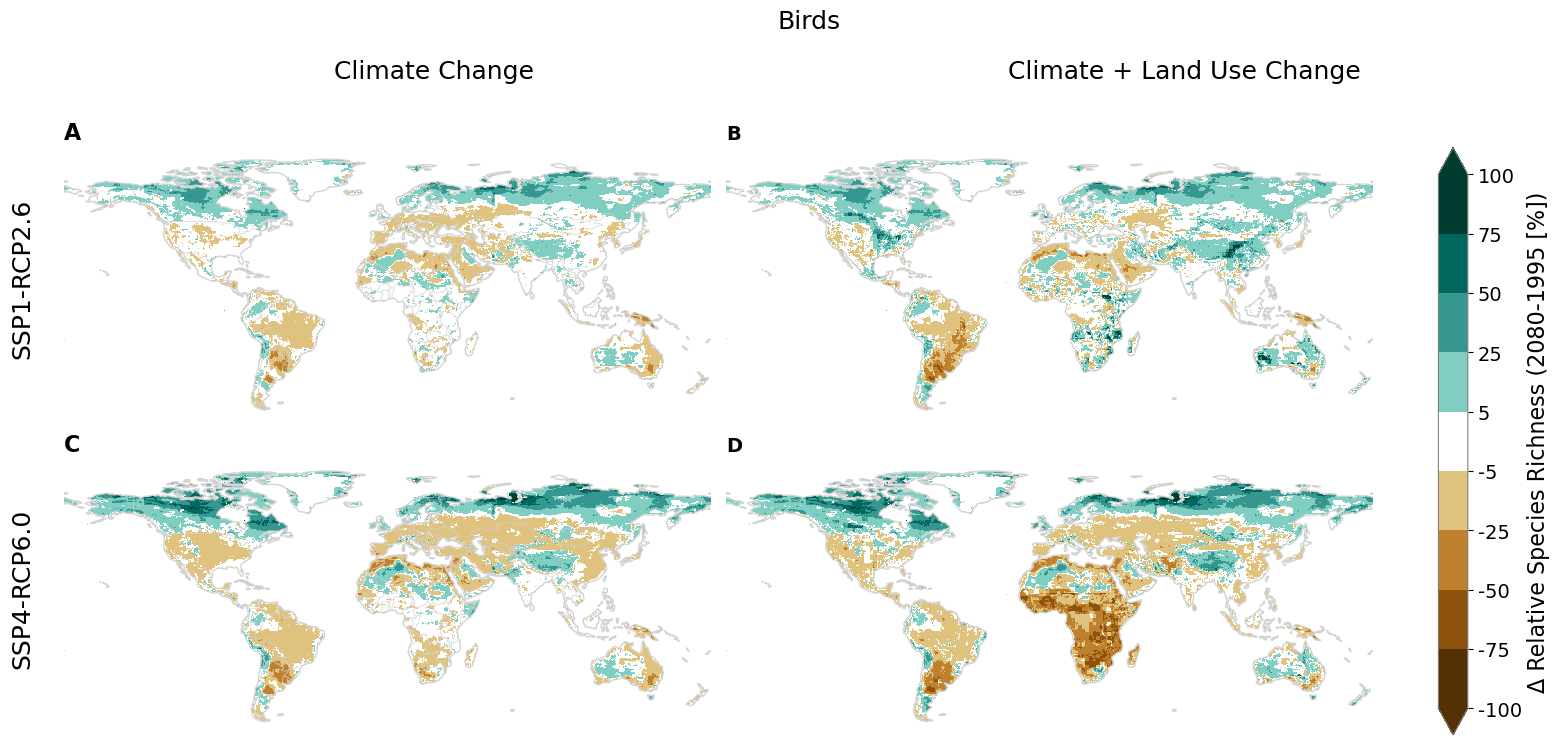

In [23]:
#relative
#relative
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050','2052', '2056', '2080', '2100', '2150', '2200', '2250']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
rcp_indices=scenario_indices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = matplotlib.colors.ListedColormap(['white', 'green'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

plot_idx = 0
subplot_labels = ['A', 'B', 'C', 'D']

for scenario in scenarios:
    # Calculate relative difference avoiding division by zero
    
    diff_newvalue = xr.where(mean_over_all_sdms_gcms_hist[scenario] != 0, (mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]) / mean_over_all_sdms_gcms_hist[scenario] * 100, 0)
    #diff_newvalue =  (mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]) / mean_over_all_sdms_gcms_hist[scenario] * 100

    diff_sumbin=  xr.where(mean_over_all_sdms_gcms_sumbin_hist[scenario] != 0, (mean_over_all_sdms_gcms_sumbin_fut[scenario]  - mean_over_all_sdms_gcms_sumbin_hist[scenario]) / mean_over_all_sdms_gcms_sumbin_hist[scenario] * 100, 0)
    #diff_sumbin=   (mean_over_all_sdms_gcms_sumbin_fut[scenario]  - mean_over_all_sdms_gcms_sumbin_hist[scenario]) / mean_over_all_sdms_gcms_sumbin_hist[scenario] * 100
    

    if plot_idx >= len(axes.flatten()):
        break
    ax1 = axes.flatten()[plot_idx]
    ax2 = axes.flatten()[plot_idx + 1]
    labels = [subplot_labels[plot_idx], subplot_labels[plot_idx + 1]]
    
    # Define the colormap and the range of values for the colorbar

    #vmin_b = diff_sum_bin.min().values
    #vmax_b = diff_sum_bin.max().values
    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffff', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850', '#006837'] RdYlGn but white in the middle 

    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#ffffff', '#a6d96a', '#66bd63', '#1a9850', '#006837'] #RdYlGn but white in the middle and only 8 + white
    
    
    #custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#f5f5f5', '#c7eae5', '#80cdc1', '#35978f', '#01665e', '#003c30'] #brown to blue
    custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#ffffff', '#80cdc1', '#35978f', '#01665e', '#003c30' ]
    #custom_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#ffffff', '#c7eae5', '#80cdc1', '#35978f', '#01665e'] # brown to turqois
    cmap = ListedColormap(custom_colors)

    boundaries =[-100, -75, -50, -25,-5, 5, 25, 50, 75, 100] # Adjust these values according to your data
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im1 = ax1.pcolormesh(diff_newvalue['lon'].values, diff_newvalue['lat'].values, np.where(diff_newvalue.values != 0, diff_newvalue.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax1, color="#ffffff", zorder=1, alpha=0)
   # ax1.set_title(f"Climate Change impact: {year_indices[future_time]} - 1995 for {scenario}",loc='center',fontsize=18 )

    ax1.axis('off')
    ax1.set_extent((-180,180,-63,90))
    ax1.add_feature(cfeature.BORDERS,color='lightgrey',linewidth=0.5)
    ax1.set_title(labels[0],loc='left',weight='bold', fontsize=16)
    
    #ax1.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    ax1.coastlines(color="lightgrey")
 


    ticks_b = np.array( [-100, -75, -50, -25, -5,5, 25, 50, 75, 100])
    tick_labels = [str(int(tick)) for tick in ticks_b]

  
    im2 = ax2.pcolormesh(diff_sumbin['lon'].values, diff_sumbin['lat'].values,  np.where(diff_sumbin.values != 0, diff_sumbin.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
    
    countries.plot(ax=ax2, color="#ffffff", zorder=1, alpha=0)

    #ax2.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    
   # ax2.set_title(f"{scenario_indices[scenario]}",loc='left',fontsize=18)

    ax2.axis('off')
    ax2.set_extent((-180,180,-63,90))
    ax2.set_title(labels[1],loc='left', weight='bold',fontsize=14)

    ax2.coastlines(color="lightgrey")
   
    # Increase the plot index by 2 to move to the next triplet of subplots
    plot_idx += 2

#cbar = plt.colorbar(im2, ax=ax2, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b,extend='both')
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.025, pad=0.05,extend='both') 
cbar.set_label('Δ Relative Species Richness (2080-1995 [%])', fontsize=16)
ticks = np.array([-100, -75, -50, -25, -5,5, 25, 50, 75, 100])
tick_labels = ['-100', '-75', '-50', '-25', '-5','5' ,'25', '50', '75', '100']

# Setzen Sie die Ticks und Tick-Labels für die Farbleiste
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
cbar.ax.tick_params(labelsize=14)

fig.text(0.75, 0.85, 'Climate + Land Use Change', ha='center', fontsize=18)

set_plot_param()
# "Climate Change" über den linken oberen Subplot
fig.text(0.25, 0.85, 'Climate Change', ha='center', fontsize=18)
fig.text(0.5, 0.9, 'Birds', ha='center', fontsize=18)

# After your plotting loop
fig.text(-0.025, 0.65, f"{scenario_indices['rcp26']}", va='center', ha='center', rotation='vertical', fontsize=18)
fig.text(-0.025, 0.34, f"{scenario_indices['rcp60']}", va='center', ha='center', rotation='vertical', fontsize=18)

# Show or save the plot
plt.savefig("/storage/homefs/ch21o450/scripts/all_figures/Fig.S2.6.png", dpi=300, bbox_inches='tight')
plt.show()

/scratch/local/8994632/ipykernel_2908423/2668742820.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


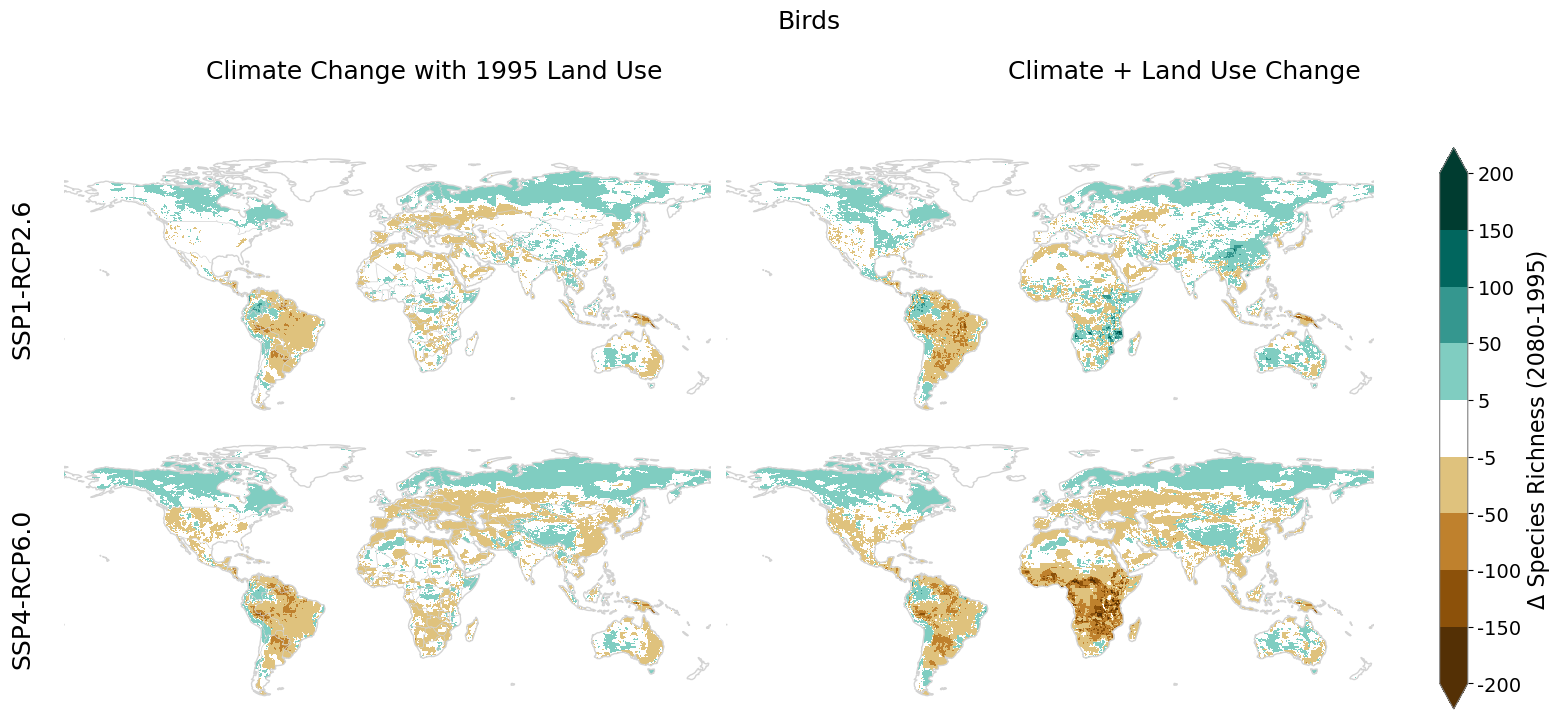

In [20]:
#absolute
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050','2052', '2056', '2080', '2100', '2150', '2200', '2250']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
rcp_indices=scenario_indices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = matplotlib.colors.ListedColormap(['white', 'green'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

plot_idx = 0
subplot_labels = ['a)', 'b)','c)','d)']
for scenario in scenarios:
    diff_newvalue = mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]
    diff_sumbin = mean_over_all_sdms_gcms_sumbin_fut[scenario] - mean_over_all_sdms_gcms_sumbin_hist[scenario]
    


# Your existing code ...
    if plot_idx >= len(axes.flatten()):
        break
    ax1 = axes.flatten()[plot_idx]
    ax2 = axes.flatten()[plot_idx + 1]
    labels = [subplot_labels[plot_idx], subplot_labels[plot_idx + 1]]
    
    # Define the colormap and the range of values for the colorbar

    #vmin_b = diff_sum_bin.min().values
    #vmax_b = diff_sum_bin.max().values
    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffff', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850', '#006837'] RdYlGn but white in the middle 

    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#ffffff', '#a6d96a', '#66bd63', '#1a9850', '#006837'] #RdYlGn but white in the middle and only 8 + white
    
    
    #custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#f5f5f5', '#c7eae5', '#80cdc1', '#35978f', '#01665e', '#003c30'] #brown to blue
    custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#ffffff', '#80cdc1', '#35978f', '#01665e', '#003c30' ]
    #custom_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#ffffff', '#c7eae5', '#80cdc1', '#35978f', '#01665e'] # brown to turqois
    cmap = ListedColormap(custom_colors)

    boundaries = [-200, -150, -100, -50,-5,5,50, 100, 150, 200] # Adjust these values according to your data
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im1 = ax1.pcolormesh(diff_newvalue['lon'].values, diff_newvalue['lat'].values, np.where(diff_newvalue.values != 0, diff_newvalue.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax1, color="#ffffff", zorder=1, alpha=0)
   # ax1.set_title(f"Climate Change impact: {year_indices[future_time]} - 1995 for {scenario}",loc='center',fontsize=18 )

    ax1.axis('off')
    ax1.set_extent((-180,180,-63,90))
    ax1.add_feature(cfeature.BORDERS,color='lightgrey',linewidth=0.5)
   # ax1.set_title(labels[0],loc='left',weight='bold', fontsize=16)
    
    #ax1.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    ax1.coastlines(color="lightgrey")


    ticks_b = np.array( [-200, -150, -100, -50,0,50, 100, 150, 200])
    tick_labels = [str(int(tick)) for tick in ticks_b]

  
    im2 = ax2.pcolormesh(diff_sumbin['lon'].values, diff_sumbin['lat'].values,  np.where(diff_sumbin.values != 0, diff_sumbin.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax2, color="#ffffff", zorder=1, alpha=0)

    #ax2.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    
   # ax2.set_title(f"{scenario_indices[scenario]}",loc='left',fontsize=18)

    ax2.axis('off')
    ax2.set_extent((-180,180,-63,90))
    #ax2.set_title(labels[1],loc='left', weight='bold',fontsize=14)

    ax2.coastlines(color="lightgrey")
   
    # Increase the plot index by 2 to move to the next triplet of subplots
    plot_idx += 2
    

#cbar = plt.colorbar(im2, ax=ax2, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b,extend='both')
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.025, pad=0.05,extend='both')                   
        
cbar.set_label('Δ Species Richness (2080-1995)', fontsize=16)
ticks = np.array([-200, -150, -100, -50, -5,5, 50, 100, 150, 200])
tick_labels = ['-200', '-150', '-100', '-50', '-5', '5','50', '100', '150', '200']

# Setzen Sie die Ticks und Tick-Labels für die Farbleiste
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
cbar.ax.tick_params(labelsize=14)

fig.text(0.75, 0.85, 'Climate + Land Use Change', ha='center', fontsize=18)


# After your plotting loop
fig.text(-0.025, 0.65, f"{scenario_indices['rcp26']}", va='center', ha='center', rotation='vertical', fontsize=18)
fig.text(-0.025, 0.34, f"{scenario_indices['rcp60']}", va='center', ha='center', rotation='vertical', fontsize=18)


set_plot_param()
# "Climate Change" über den linken oberen Subplot
fig.text(0.25, 0.85, 'Climate Change with 1995 Land Use', ha='center', fontsize=18)

#fig.text(0.5, 0.9, 'Amphibians', ha='center', fontsize=18)
fig.text(0.5, 0.9, 'Birds', ha='center', fontsize=18)
# Show or save the plot

plt.savefig("/storage/homefs/ch21o450/scripts/climate_Hari_etal_inprep/functions/figures/main_figures/Figure_S4.png")
plt.show()

# Figure S6: Absolute change 2080-1995 Amphibians only

In [24]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Displaying the created weights fo
# Specify the output directory
output_dir = "/storage/workspaces/wa_climate/climate_trt/chari/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    


    for sdm in sdms:
        mean_newvalue_hist[scenario][sdm] = {}
        mean_newvalue_fut[scenario][sdm] = {}
        mean_sumbin_hist[scenario][sdm] = {}
        mean_sumbin_fut[scenario][sdm] = {}
        
        dataarrays_newvalue_hist = []
        dataarrays_newvalue_fut = []
        dataarrays_sumbin_hist = []
        dataarrays_sumbin_fut = []

        for gcm in gcms:
            mean_newvalue_hist[scenario][sdm][gcm] = {}
            mean_newvalue_fut[scenario][sdm][gcm] = {}
            mean_sumbin_hist[scenario][sdm][gcm] = {}
            mean_sumbin_fut[scenario][sdm][gcm] = {}
            
            sum_newvalue_hist = None
            sum_newvalue_future = None
            sum_sumbin_hist = None
            sum_sumbin_future = None

            for taxa in taxas:
                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4_newbase.pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4_newbase.pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa = pickle.load(f)

     # Sum across taxa
                if sum_newvalue_hist is None:
                    sum_newvalue_hist = newvalue_hist_taxa
                    sum_newvalue_future = newvalue_future_taxa
                    sum_sumbin_hist = sum_bin_hist_taxa
                    sum_sumbin_future = sum_bin_future_taxa
                else:
                    sum_newvalue_hist += newvalue_hist_taxa
                    sum_newvalue_future += newvalue_future_taxa
                    sum_sumbin_hist += sum_bin_hist_taxa
                    sum_sumbin_future += sum_bin_future_taxa
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                    
            # Assign the summed values to your dictionary
            mean_newvalue_hist[scenario][sdm][gcm] = sum_newvalue_hist
            mean_newvalue_fut[scenario][sdm][gcm] = sum_newvalue_future
            mean_sumbin_hist[scenario][sdm][gcm] = sum_sumbin_hist
            mean_sumbin_fut[scenario][sdm][gcm] = sum_sumbin_future

            dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][sdm][gcm])
            dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][sdm][gcm])
            dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][sdm][gcm])
            dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][sdm][gcm])

        # Concatenate and calculate the mean over the new dimension
        mean_over_sdms_gcms_hist[scenario][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_fut[scenario][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_hist[scenario][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_fut[scenario][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')

               # Append the mean DataArrays across GCMs to the SDM lists
        dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][sdm])
        dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][sdm])
        dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][sdm])
        dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][sdm])

    # Concatenate and calculate the mean over SDMs
    mean_over_all_sdms_gcms_hist[scenario] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_fut[scenario] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm') 
    

/scratch/local/16563686/ipykernel_4171137/2374164382.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


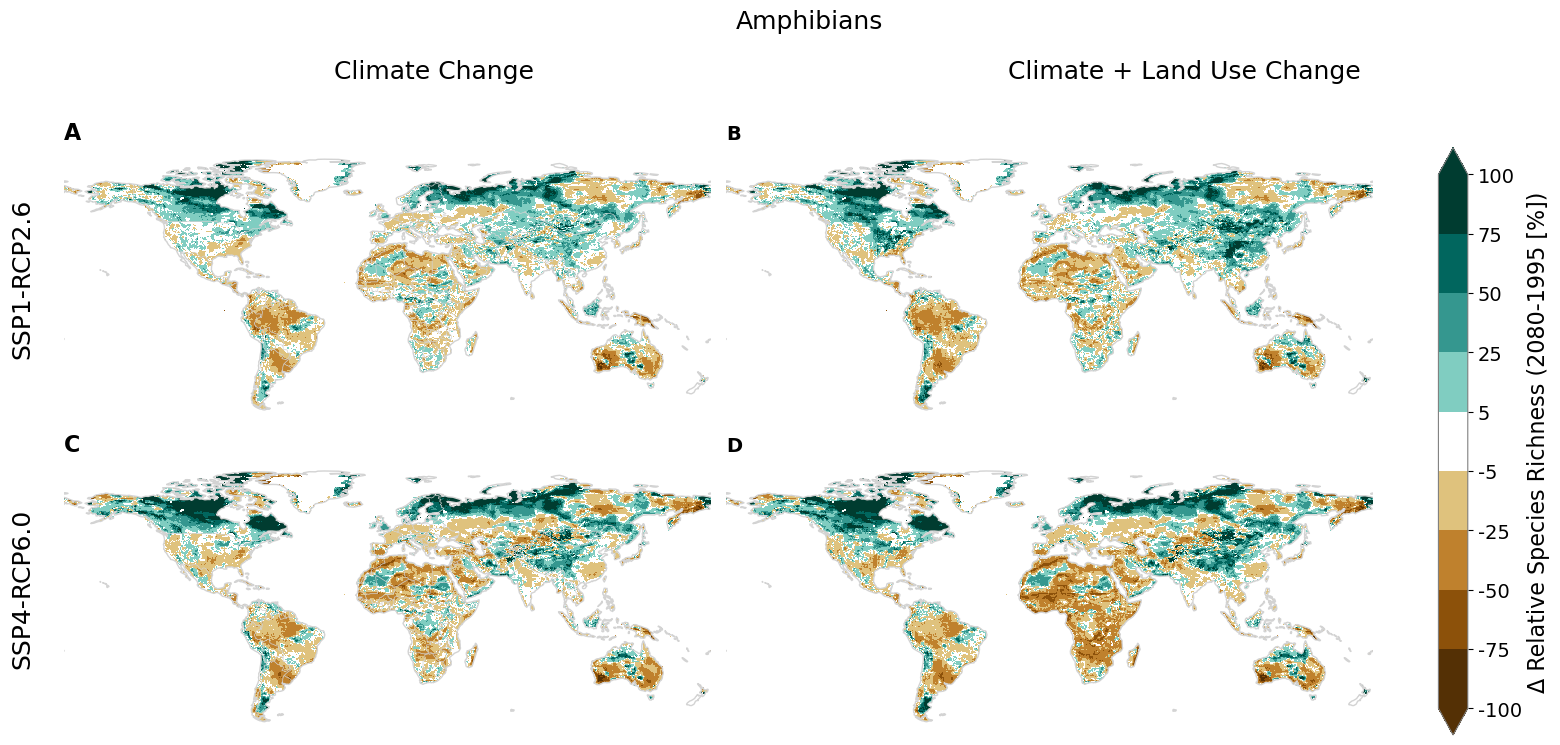

In [21]:
#rellative
#relative
#relative
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050','2052', '2056', '2080', '2100', '2150', '2200', '2250']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
rcp_indices=scenario_indices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = matplotlib.colors.ListedColormap(['white', 'green'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

plot_idx = 0
subplot_labels = ['A', 'B', 'C', 'D']

for scenario in scenarios:
    # Calculate relative difference avoiding division by zero
    
    diff_newvalue = xr.where(mean_over_all_sdms_gcms_hist[scenario] != 0, (mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]) / mean_over_all_sdms_gcms_hist[scenario] * 100, 0)
    #diff_newvalue =  (mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]) / mean_over_all_sdms_gcms_hist[scenario] * 100

    diff_sumbin=  xr.where(mean_over_all_sdms_gcms_sumbin_hist[scenario] != 0, (mean_over_all_sdms_gcms_sumbin_fut[scenario]  - mean_over_all_sdms_gcms_sumbin_hist[scenario]) / mean_over_all_sdms_gcms_sumbin_hist[scenario] * 100, 0)
    #diff_sumbin=   (mean_over_all_sdms_gcms_sumbin_fut[scenario]  - mean_over_all_sdms_gcms_sumbin_hist[scenario]) / mean_over_all_sdms_gcms_sumbin_hist[scenario] * 100
    

    if plot_idx >= len(axes.flatten()):
        break
    ax1 = axes.flatten()[plot_idx]
    ax2 = axes.flatten()[plot_idx + 1]
    labels = [subplot_labels[plot_idx], subplot_labels[plot_idx + 1]]
    
    # Define the colormap and the range of values for the colorbar

    #vmin_b = diff_sum_bin.min().values
    #vmax_b = diff_sum_bin.max().values
    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffff', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850', '#006837'] RdYlGn but white in the middle 

    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#ffffff', '#a6d96a', '#66bd63', '#1a9850', '#006837'] #RdYlGn but white in the middle and only 8 + white
    
    
    #custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#f5f5f5', '#c7eae5', '#80cdc1', '#35978f', '#01665e', '#003c30'] #brown to blue
    custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#ffffff', '#80cdc1', '#35978f', '#01665e', '#003c30' ]
    #custom_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#ffffff', '#c7eae5', '#80cdc1', '#35978f', '#01665e'] # brown to turqois
    cmap = ListedColormap(custom_colors)

    boundaries =[-100, -75, -50, -25,-5, 5, 25, 50, 75, 100] # Adjust these values according to your data
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im1 = ax1.pcolormesh(diff_newvalue['lon'].values, diff_newvalue['lat'].values, np.where(diff_newvalue.values != 0, diff_newvalue.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax1, color="#ffffff", zorder=1, alpha=0)
   # ax1.set_title(f"Climate Change impact: {year_indices[future_time]} - 1995 for {scenario}",loc='center',fontsize=18 )

    ax1.axis('off')
    ax1.set_extent((-180,180,-63,90))
    ax1.add_feature(cfeature.BORDERS,color='lightgrey',linewidth=0.5)
    ax1.set_title(labels[0],loc='left',weight='bold', fontsize=16)
    
    #ax1.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    ax1.coastlines(color="lightgrey")
 


    ticks_b = np.array( [-100, -75, -50, -25, -5,5, 25, 50, 75, 100])
    tick_labels = [str(int(tick)) for tick in ticks_b]

  
    im2 = ax2.pcolormesh(diff_sumbin['lon'].values, diff_sumbin['lat'].values,  np.where(diff_sumbin.values != 0, diff_sumbin.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
    
    countries.plot(ax=ax2, color="#ffffff", zorder=1, alpha=0)

    #ax2.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    
   # ax2.set_title(f"{scenario_indices[scenario]}",loc='left',fontsize=18)

    ax2.axis('off')
    ax2.set_extent((-180,180,-63,90))
    ax2.set_title(labels[1],loc='left', weight='bold',fontsize=14)

    ax2.coastlines(color="lightgrey")
   
    # Increase the plot index by 2 to move to the next triplet of subplots
    plot_idx += 2

#cbar = plt.colorbar(im2, ax=ax2, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b,extend='both')
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.025, pad=0.05,extend='both') 
cbar.set_label('Δ Relative Species Richness (2080-1995 [%])', fontsize=16)
ticks = np.array([-100, -75, -50, -25, -5,5, 25, 50, 75, 100])
tick_labels = ['-100', '-75', '-50', '-25', '-5','5' ,'25', '50', '75', '100']

# Setzen Sie die Ticks und Tick-Labels für die Farbleiste
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
cbar.ax.tick_params(labelsize=14)

fig.text(0.75, 0.85, 'Climate + Land Use Change', ha='center', fontsize=18)

set_plot_param()
# "Climate Change" über den linken oberen Subplot
fig.text(0.25, 0.85, 'Climate Change', ha='center', fontsize=18)
fig.text(0.5, 0.9, 'Amphibians', ha='center', fontsize=18)

# After your plotting loop
fig.text(-0.025, 0.65, f"{scenario_indices['rcp26']}", va='center', ha='center', rotation='vertical', fontsize=18)
fig.text(-0.025, 0.34, f"{scenario_indices['rcp60']}", va='center', ha='center', rotation='vertical', fontsize=18)

# Show or save the plot
plt.savefig("/storage/homefs/ch21o450/scripts/all_figures/Fig.S2.5.png", dpi=300, bbox_inches='tight')
plt.show()

/scratch/local/8994632/ipykernel_2908423/882364157.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


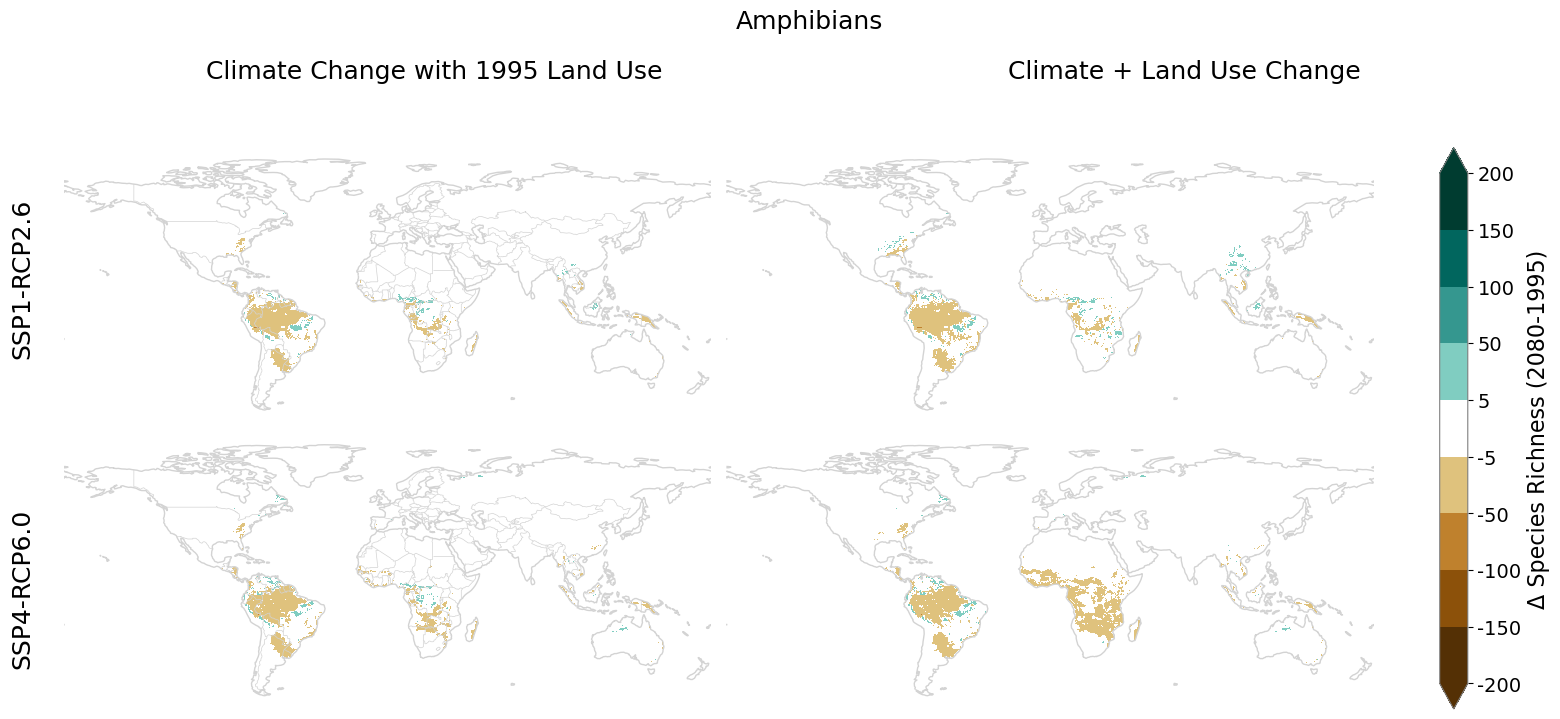

In [22]:
#absolute
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050','2052', '2056', '2080', '2100', '2150', '2200', '2250']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
rcp_indices=scenario_indices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = matplotlib.colors.ListedColormap(['white', 'green'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

plot_idx = 0
subplot_labels = ['a)', 'b)','c)','d)']
for scenario in scenarios:
    diff_newvalue = mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]
    diff_sumbin = mean_over_all_sdms_gcms_sumbin_fut[scenario] - mean_over_all_sdms_gcms_sumbin_hist[scenario]
    


# Your existing code ...
    if plot_idx >= len(axes.flatten()):
        break
    ax1 = axes.flatten()[plot_idx]
    ax2 = axes.flatten()[plot_idx + 1]
    labels = [subplot_labels[plot_idx], subplot_labels[plot_idx + 1]]
    
    # Define the colormap and the range of values for the colorbar

    #vmin_b = diff_sum_bin.min().values
    #vmax_b = diff_sum_bin.max().values
    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffff', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850', '#006837'] RdYlGn but white in the middle 

    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#ffffff', '#a6d96a', '#66bd63', '#1a9850', '#006837'] #RdYlGn but white in the middle and only 8 + white
    
    
    #custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#f5f5f5', '#c7eae5', '#80cdc1', '#35978f', '#01665e', '#003c30'] #brown to blue
    custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#ffffff', '#80cdc1', '#35978f', '#01665e', '#003c30' ]
    #custom_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#ffffff', '#c7eae5', '#80cdc1', '#35978f', '#01665e'] # brown to turqois
    cmap = ListedColormap(custom_colors)

    boundaries = [-200, -150, -100, -50,-5,5,50, 100, 150, 200] # Adjust these values according to your data
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im1 = ax1.pcolormesh(diff_newvalue['lon'].values, diff_newvalue['lat'].values, np.where(diff_newvalue.values != 0, diff_newvalue.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax1, color="#ffffff", zorder=1, alpha=0)
   # ax1.set_title(f"Climate Change impact: {year_indices[future_time]} - 1995 for {scenario}",loc='center',fontsize=18 )

    ax1.axis('off')
    ax1.set_extent((-180,180,-63,90))
    ax1.add_feature(cfeature.BORDERS,color='lightgrey',linewidth=0.5)
  #  ax1.set_title(labels[0],loc='left',weight='bold', fontsize=16)
    
    #ax1.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    ax1.coastlines(color="lightgrey")


    ticks_b = np.array( [-200, -150, -100, -50,0,50, 100, 150, 200])
    tick_labels = [str(int(tick)) for tick in ticks_b]

  
    im2 = ax2.pcolormesh(diff_sumbin['lon'].values, diff_sumbin['lat'].values,  np.where(diff_sumbin.values != 0, diff_sumbin.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax2, color="#ffffff", zorder=1, alpha=0)

    #ax2.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    
  #  ax2.set_title(f"{scenario_indices[scenario]}",loc='left',fontsize=18)

    ax2.axis('off')
    ax2.set_extent((-180,180,-63,90))
 #   ax2.set_title(labels[1],loc='left', weight='bold',fontsize=14)

    ax2.coastlines(color="lightgrey")
   
    # Increase the plot index by 2 to move to the next triplet of subplots
    plot_idx += 2
    

#cbar = plt.colorbar(im2, ax=ax2, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b,extend='both')
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.025, pad=0.05,extend='both')                   
        
cbar.set_label('Δ Species Richness (2080-1995)', fontsize=16)
ticks = np.array([-200, -150, -100, -50, -5,5, 50, 100, 150, 200])
tick_labels = ['-200', '-150', '-100', '-50', '-5', '5','50', '100', '150', '200']

# Setzen Sie die Ticks und Tick-Labels für die Farbleiste
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
cbar.ax.tick_params(labelsize=14)

fig.text(0.75, 0.85, 'Climate + Land Use Change', ha='center', fontsize=18)


# After your plotting loop
fig.text(-0.025, 0.65, f"{scenario_indices['rcp26']}", va='center', ha='center', rotation='vertical', fontsize=18)
fig.text(-0.025, 0.34, f"{scenario_indices['rcp60']}", va='center', ha='center', rotation='vertical', fontsize=18)


set_plot_param()
# "Climate Change" über den linken oberen Subplot
fig.text(0.25, 0.85, 'Climate Change with 1995 Land Use', ha='center', fontsize=18)

fig.text(0.5, 0.9, 'Amphibians', ha='center', fontsize=18)

# Show or save the plot

plt.savefig("/storage/homefs/ch21o450/scripts/climate_Hari_etal_inprep/functions/figures/main_figures/Figure_S3.png")
plt.show()

# Figure S7: Absolute change 2080-1995 No Dispersal 

In [7]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Displaying the created weights fo
# Specify the output directory
output_dir = "/storage/workspaces/wa_climate/climate_trt/chari/intermediate_results/"
output_dir2= "/storage/homefs/ch21o450/intermediate_results/"


# List of taxa, SDMs, and GCMs
taxas = ["Mammals","Bird","Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    


    for sdm in sdms:
        mean_newvalue_hist[scenario][sdm] = {}
        mean_newvalue_fut[scenario][sdm] = {}
        mean_sumbin_hist[scenario][sdm] = {}
        mean_sumbin_fut[scenario][sdm] = {}
        
        dataarrays_newvalue_hist = []
        dataarrays_newvalue_fut = []
        dataarrays_sumbin_hist = []
        dataarrays_sumbin_fut = []

        for gcm in gcms:
            mean_newvalue_hist[scenario][sdm][gcm] = {}
            mean_newvalue_fut[scenario][sdm][gcm] = {}
            mean_sumbin_hist[scenario][sdm][gcm] = {}
            mean_sumbin_fut[scenario][sdm][gcm] = {}
            
            sum_newvalue_hist = None
            sum_newvalue_future = None
            sum_sumbin_hist = None
            sum_sumbin_future = None

            for taxa in taxas:
                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal0_newbase.pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal0_newbase.pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir2, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal0.pkl")
                sum_bin_future_sum_path = os.path.join(output_dir2, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal0.pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa = pickle.load(f)

     # Sum across taxa
                if sum_newvalue_hist is None:
                    sum_newvalue_hist = newvalue_hist_taxa
                    sum_newvalue_future = newvalue_future_taxa
                    sum_sumbin_hist = sum_bin_hist_taxa
                    sum_sumbin_future = sum_bin_future_taxa
                else:
                    sum_newvalue_hist += newvalue_hist_taxa
                    sum_newvalue_future += newvalue_future_taxa
                    sum_sumbin_hist += sum_bin_hist_taxa
                    sum_sumbin_future += sum_bin_future_taxa
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                    
            # Assign the summed values to your dictionary
            mean_newvalue_hist[scenario][sdm][gcm] = sum_newvalue_hist
            mean_newvalue_fut[scenario][sdm][gcm] = sum_newvalue_future
            mean_sumbin_hist[scenario][sdm][gcm] = sum_sumbin_hist
            mean_sumbin_fut[scenario][sdm][gcm] = sum_sumbin_future

            dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][sdm][gcm])
            dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][sdm][gcm])
            dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][sdm][gcm])
            dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][sdm][gcm])

        # Concatenate and calculate the mean over the new dimension
        mean_over_sdms_gcms_hist[scenario][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_fut[scenario][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_hist[scenario][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_fut[scenario][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')

               # Append the mean DataArrays across GCMs to the SDM lists
        dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][sdm])
        dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][sdm])
        dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][sdm])
        dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][sdm])

    # Concatenate and calculate the mean over SDMs
    mean_over_all_sdms_gcms_hist[scenario] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_fut[scenario] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm') 
    

In [8]:
import matplotlib as mpl
def set_plot_param():
    mpl.rc('axes',edgecolor='grey')
    mpl.rc('axes',labelcolor='black')
    mpl.rc('xtick',color='black')
    mpl.rc('xtick',labelsize=14)
    mpl.rc('ytick',color='black')
    mpl.rc('ytick',labelsize=14)
    mpl.rc('axes',titlesize=18)
    mpl.rc('axes',labelsize=14)
    mpl.rc('legend',fontsize='large')
    mpl.rc('text',color='black')    

/scratch/local/16563686/ipykernel_4171137/3157117671.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


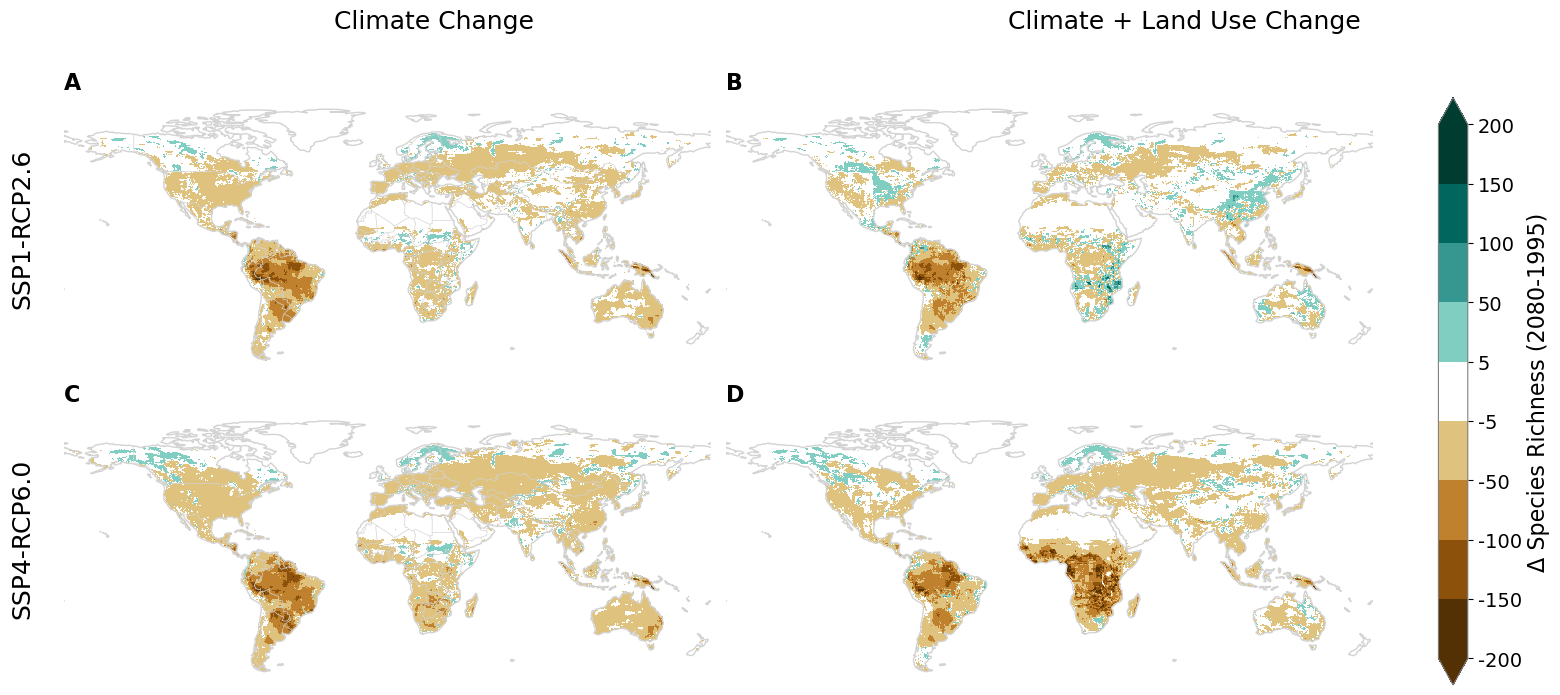

In [9]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050','2052', '2056', '2080', '2100', '2150', '2200', '2250']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
rcp_indices=scenario_indices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = matplotlib.colors.ListedColormap(['white', 'green'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

plot_idx = 0
subplot_labels = ['A', 'B','C','D']
for scenario in scenarios:
    diff_newvalue = mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]
    diff_sumbin = mean_over_all_sdms_gcms_sumbin_fut[scenario] - mean_over_all_sdms_gcms_sumbin_hist[scenario]
    


# Your existing code ...
    if plot_idx >= len(axes.flatten()):
        break
    ax1 = axes.flatten()[plot_idx]
    ax2 = axes.flatten()[plot_idx + 1]
    labels = [subplot_labels[plot_idx], subplot_labels[plot_idx + 1]]
    
    # Define the colormap and the range of values for the colorbar

    #vmin_b = diff_sum_bin.min().values
    #vmax_b = diff_sum_bin.max().values
    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffff', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850', '#006837'] RdYlGn but white in the middle 

    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#ffffff', '#a6d96a', '#66bd63', '#1a9850', '#006837'] #RdYlGn but white in the middle and only 8 + white
    
    
    #custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#f5f5f5', '#c7eae5', '#80cdc1', '#35978f', '#01665e', '#003c30'] #brown to blue
    custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#ffffff', '#80cdc1', '#35978f', '#01665e', '#003c30' ]
    #custom_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#ffffff', '#c7eae5', '#80cdc1', '#35978f', '#01665e'] # brown to turqois
    cmap = ListedColormap(custom_colors)

    boundaries = [-200, -150, -100, -50,-5,5,50, 100, 150, 200] # Adjust these values according to your data
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im1 = ax1.pcolormesh(diff_newvalue['lon'].values, diff_newvalue['lat'].values, np.where(diff_newvalue.values != 0, diff_newvalue.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax1, color="#ffffff", zorder=1, alpha=0)
   # ax1.set_title(f"Climate Change impact: {year_indices[future_time]} - 1995 for {scenario}",loc='center',fontsize=18 )

    ax1.axis('off')
    ax1.set_extent((-180,180,-63,90))
    ax1.add_feature(cfeature.BORDERS,color='lightgrey',linewidth=0.5)
    ax1.set_title(labels[0],loc='left',weight='bold', fontsize=16)
    
    #ax1.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    ax1.coastlines(color="lightgrey")


    ticks_b = np.array( [-200, -150, -100, -50,0,50, 100, 150, 200])
    tick_labels = [str(int(tick)) for tick in ticks_b]

  
    im2 = ax2.pcolormesh(diff_sumbin['lon'].values, diff_sumbin['lat'].values,  np.where(diff_sumbin.values != 0, diff_sumbin.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax2, color="#ffffff", zorder=1, alpha=0)

    #ax2.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    
   # ax2.set_title(f"{scenario_indices[scenario]}",loc='left',fontsize=18)

    ax2.axis('off')
    ax2.set_extent((-180,180,-63,90))
    ax2.set_title(labels[1],loc='left', weight='bold',fontsize=16)

    ax2.coastlines(color="lightgrey")
   
    # Increase the plot index by 2 to move to the next triplet of subplots
    plot_idx += 2
    

#cbar = plt.colorbar(im2, ax=ax2, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b,extend='both')
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.025, pad=0.05,extend='both')                   
        
cbar.set_label('Δ Species Richness (2080-1995)', fontsize=16)
ticks = np.array([-200, -150, -100, -50, -5,5, 50, 100, 150, 200])
tick_labels = ['-200', '-150', '-100', '-50', '-5', '5','50', '100', '150', '200']

# Setzen Sie die Ticks und Tick-Labels für die Farbleiste
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
cbar.ax.tick_params(labelsize=14)

fig.text(0.75, 0.85, 'Climate + Land Use Change', ha='center', fontsize=18)


# After your plotting loop
fig.text(-0.025, 0.65, f"{scenario_indices['rcp26']}", va='center', ha='center', rotation='vertical', fontsize=18)
fig.text(-0.025, 0.34, f"{scenario_indices['rcp60']}", va='center', ha='center', rotation='vertical', fontsize=18)


set_plot_param()
# "Climate Change" über den linken oberen Subplot
fig.text(0.25, 0.85, 'Climate Change', ha='center', fontsize=18)

#fig.text(0.5, 0.9, 'Amphibians', ha='center', fontsize=18)

# Show or save the plot

plt.savefig("/storage/homefs/ch21o450/scripts/all_figures/Fig.S2.3.png", dpi=300, bbox_inches='tight')
plt.show()

# Figure S8: LUH2 Chnange 2080-1995 (???)

/scratch/local/16638790/ipykernel_1336602/1191619271.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


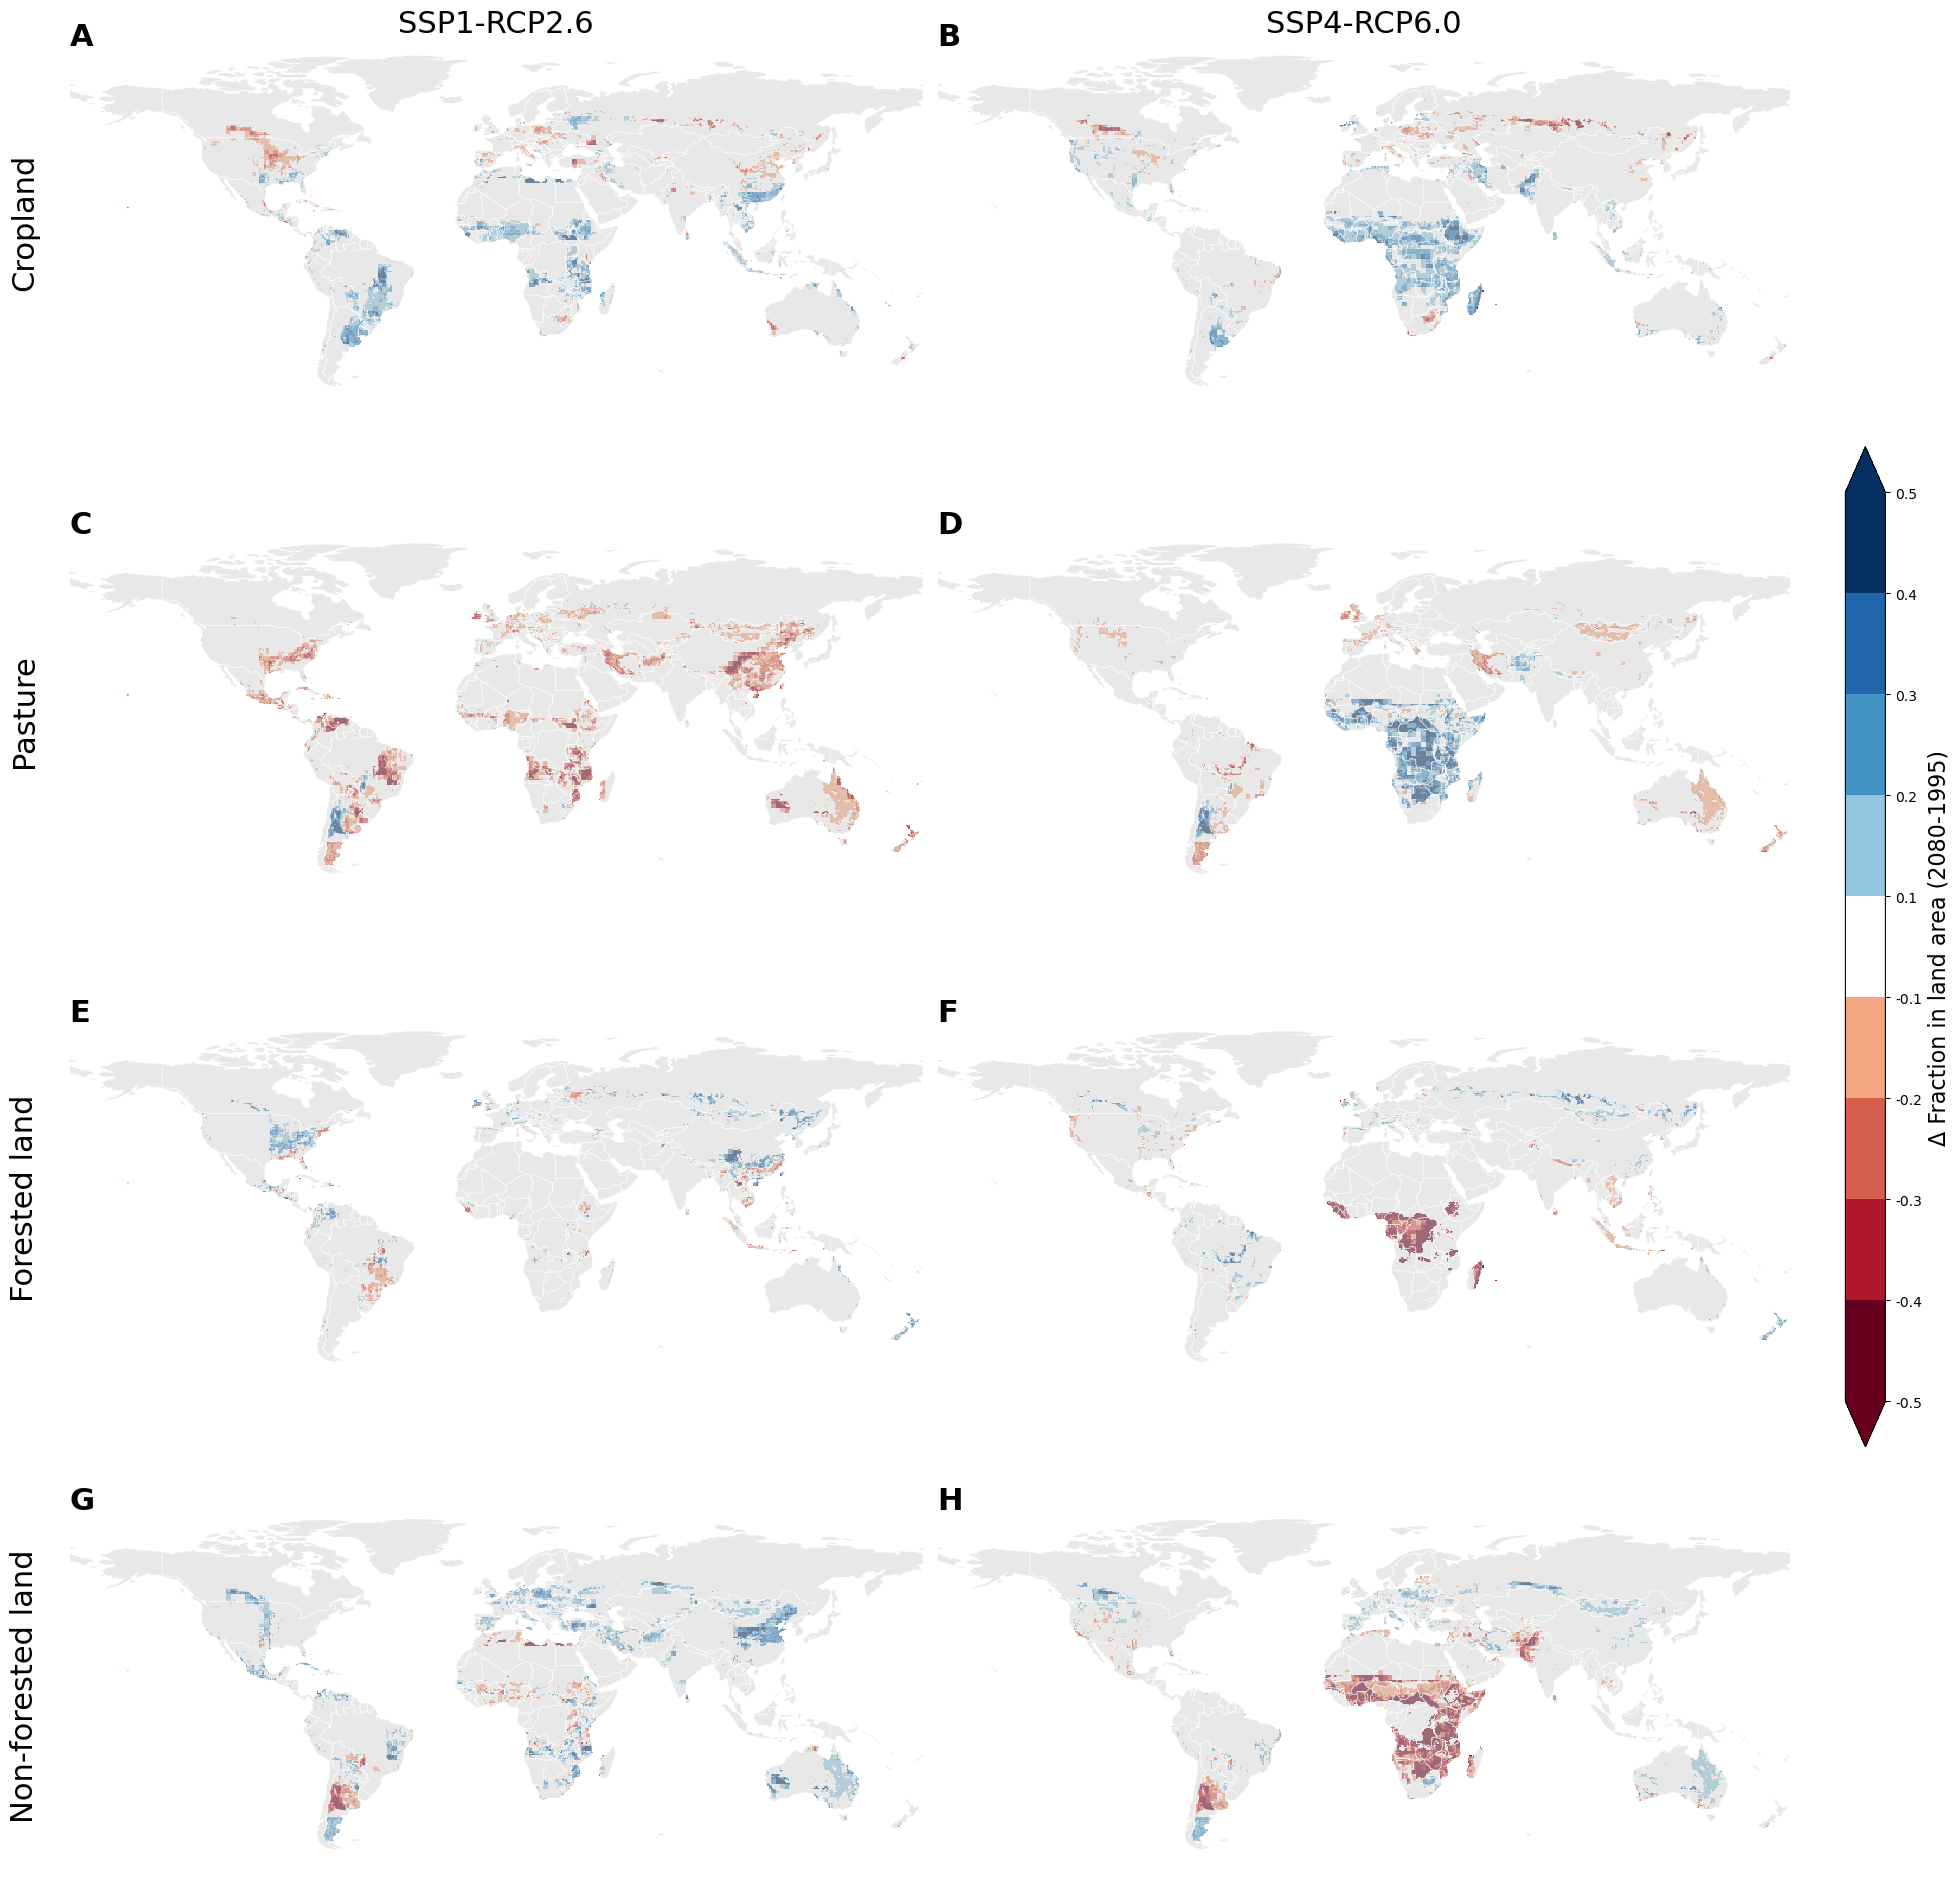

In [4]:
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm

# Assuming set_plot_param() is defined elsewhere
# set_plot_param() 

warnings.filterwarnings('ignore', category=UserWarning)
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Load SSP460 data
ssp460_ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp460.nc"
da_landuse_ssp460 = xr.open_dataset(ssp460_ncfname, decode_times=False).isel(time=[65])

# Load SSP126 data
ssp126_ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"
da_landuse_ssp126 = xr.open_dataset(ssp126_ncfname, decode_times=False).isel(time=[65])

# Historical data remains the same
LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"
da_historic = xr.open_dataset(LUH_historic, decode_times=False).isel(time=1146)

# Define category mappings and custom colors
category_mapping = {
    'Cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'Pasture': ['pastr', 'range'],
    'Forested land': ['primf', 'secdf'],
    'Non-forested land': ['primn', 'secdn']
}


scenario_indices={"SSP126": 'SSP1-RCP2.6', "SSP460": 'SSP4-RCP6.0'}
custom_colors = ['#67001f', '#b2182b', '#d6604d', '#f4a582', '#ffffff', '#92c5de', '#4393c3', '#2166ac', '#053061']
cmap = ListedColormap(custom_colors)
boundaries = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5]
norm = BoundaryNorm(boundaries, cmap.N)
subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# Compute subplot index for labeling (row-major order)
 
num_categories = len(category_mapping)

# Create a subplot grid with rows for each category and 2 columns for SSP460 and SSP126
fig, axes = plt.subplots(nrows=num_categories, ncols=2, figsize=(20, 5 * num_categories), subplot_kw={'projection': ccrs.PlateCarree()})

for i, (category, vars_in_category) in enumerate(category_mapping.items()):
    for j, scenario in enumerate(['SSP126', 'SSP460']):
        ax = axes[i, j]

        subplot_idx = i * 2 + j 
        
        da_landuse = da_landuse_ssp460 if scenario == 'SSP460' else da_landuse_ssp126
        difference = sum(da_landuse[var].isel(time=0) for var in vars_in_category) - sum(da_historic[var] for var in vars_in_category)
        im = ax.pcolormesh(difference['lon'].values, difference['lat'].values, difference.values, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
        
        ax.set_extent((-180, 180, -63, 90))
        ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
        countries.plot(ax=ax, color="lightgray", zorder=1, alpha=0.5)
        ax.axis('off')
        # Set scenario titles for the top row
        if i == 0:
            ax.set_title(f"{scenario_indices[scenario]}", fontsize=22)
        # Set category labels for the first column
        if j == 0:
            ax.text(-0.07, 0.5, category, va='center', ha='left', rotation='vertical', transform=ax.transAxes, fontsize=22)

        ax.text(0, 1.05, subplot_labels[subplot_idx], transform=ax.transAxes,
                fontsize=22, fontweight='bold', va='top', ha='left')

# Adjust layout
fig.tight_layout(rect=[0, 0, 0.9, 1])

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # Adjust colorbar position cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical', extend='both')
cbar.set_label('Δ Fraction in land area (2080-1995)', fontsize=16)
cbar.set_ticks(boundaries)
cbar.set_ticklabels(['-0.5', '-0.4', '-0.3', '-0.2', '-0.1', '0.1', '0.2', '0.3', '0.4', '0.5'])
#plt.savefig("/storage/homefs/ch21o450/scripts/all_figures/Fig.S2.9.png", dpi=300, bbox_inches='tight')
plt.show()


In [47]:
# "Sensitivity"
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Displaying the created weights fo
# Specify the output directory
output_dir2= "/storage/homefs/ch21o450/intermediate_results/"
# List of taxa, SDMs, and GCMs
taxas = ["Mammals","Bird","Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    


    for sdm in sdms:
        mean_newvalue_hist[scenario][sdm] = {}
        mean_newvalue_fut[scenario][sdm] = {}
        mean_sumbin_hist[scenario][sdm] = {}
        mean_sumbin_fut[scenario][sdm] = {}
        
        dataarrays_newvalue_hist = []
        dataarrays_newvalue_fut = []
        dataarrays_sumbin_hist = []
        dataarrays_sumbin_fut = []

        for gcm in gcms:
            mean_newvalue_hist[scenario][sdm][gcm] = {}
            mean_newvalue_fut[scenario][sdm][gcm] = {}
            mean_sumbin_hist[scenario][sdm][gcm] = {}
            mean_sumbin_fut[scenario][sdm][gcm] = {}
            
            sum_newvalue_hist = None
            sum_newvalue_future = None
            sum_sumbin_hist = None
            sum_sumbin_future = None

            for taxa in taxas:
                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_SA_newbase.pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_SA_newbase.pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir2, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_SA.pkl")
                sum_bin_future_sum_path = os.path.join(output_dir2, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_SA.pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa = pickle.load(f)

     # Sum across taxa
                if sum_newvalue_hist is None:
                    sum_newvalue_hist = newvalue_hist_taxa
                    sum_newvalue_future = newvalue_future_taxa
                    sum_sumbin_hist = sum_bin_hist_taxa
                    sum_sumbin_future = sum_bin_future_taxa
                else:
                    sum_newvalue_hist += newvalue_hist_taxa
                    sum_newvalue_future += newvalue_future_taxa
                    sum_sumbin_hist += sum_bin_hist_taxa
                    sum_sumbin_future += sum_bin_future_taxa
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                    
            # Assign the summed values to your dictionary
            mean_newvalue_hist[scenario][sdm][gcm] = sum_newvalue_hist
            mean_newvalue_fut[scenario][sdm][gcm] = sum_newvalue_future
            mean_sumbin_hist[scenario][sdm][gcm] = sum_sumbin_hist
            mean_sumbin_fut[scenario][sdm][gcm] = sum_sumbin_future

            dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][sdm][gcm])
            dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][sdm][gcm])
            dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][sdm][gcm])
            dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][sdm][gcm])

        # Concatenate and calculate the mean over the new dimension
        mean_over_sdms_gcms_hist[scenario][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').mean(dim='gcm')
        mean_over_sdms_gcms_fut[scenario][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_hist[scenario][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').mean(dim='gcm')
        mean_over_sdms_gcms_sumbin_fut[scenario][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').mean(dim='gcm')

               # Append the mean DataArrays across GCMs to the SDM lists
        dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][sdm])
        dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][sdm])
        dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][sdm])
        dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][sdm])

    # Concatenate and calculate the mean over SDMs
    mean_over_all_sdms_gcms_hist[scenario] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').mean(dim='sdm')
    mean_over_all_sdms_gcms_fut[scenario] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').mean(dim='sdm')
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').mean(dim='sdm') 
    

/scratch/local/16563686/ipykernel_4171137/3719752636.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


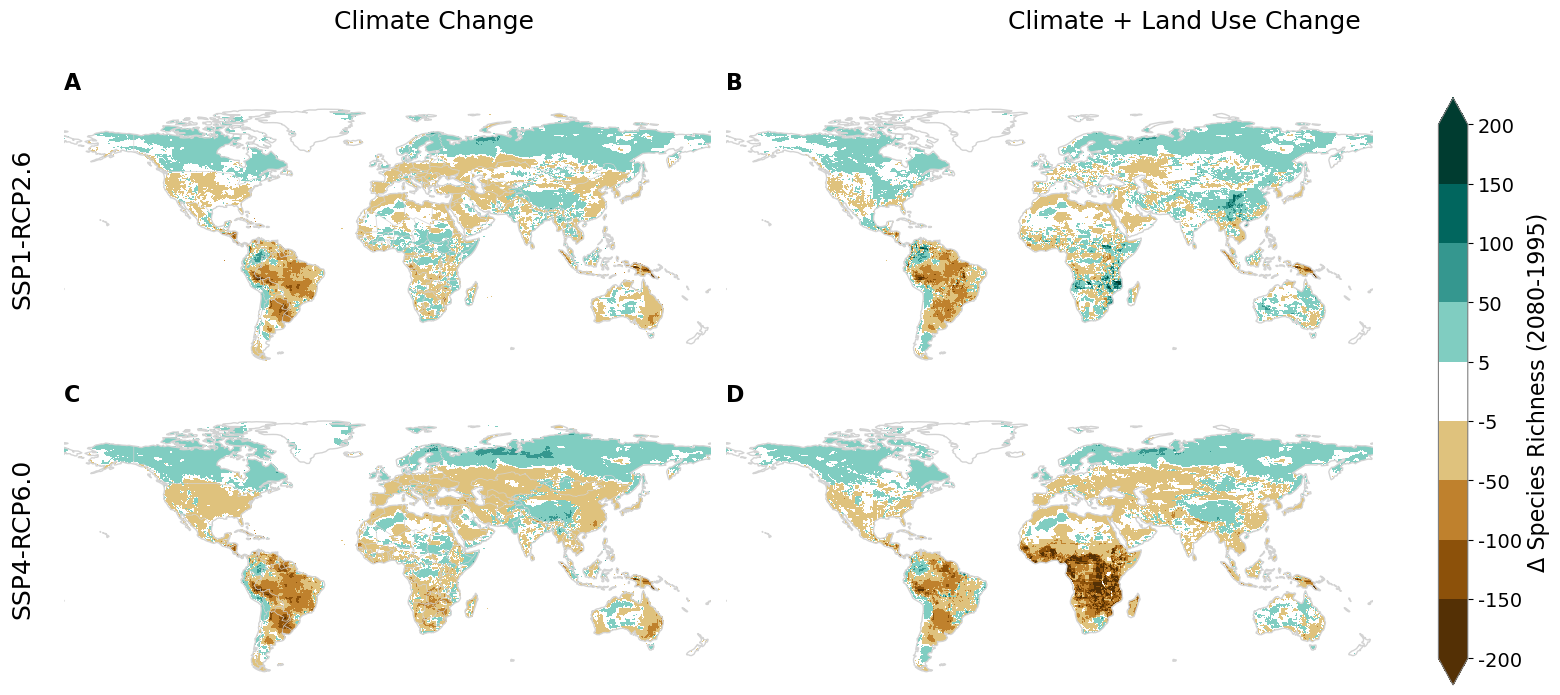

In [48]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050','2052', '2056', '2080', '2100', '2150', '2200', '2250']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
rcp_indices=scenario_indices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = matplotlib.colors.ListedColormap(['white', 'green'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

plot_idx = 0
subplot_labels = ['A', 'B','C','D']
for scenario in scenarios:
    diff_newvalue = mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario]
    diff_sumbin = mean_over_all_sdms_gcms_sumbin_fut[scenario] - mean_over_all_sdms_gcms_sumbin_hist[scenario]
    


# Your existing code ...
    if plot_idx >= len(axes.flatten()):
        break
    ax1 = axes.flatten()[plot_idx]
    ax2 = axes.flatten()[plot_idx + 1]
    labels = [subplot_labels[plot_idx], subplot_labels[plot_idx + 1]]
    
    # Define the colormap and the range of values for the colorbar

    #vmin_b = diff_sum_bin.min().values
    #vmax_b = diff_sum_bin.max().values
    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffff', '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850', '#006837'] RdYlGn but white in the middle 

    #custom_colors = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#ffffff', '#a6d96a', '#66bd63', '#1a9850', '#006837'] #RdYlGn but white in the middle and only 8 + white
    
    
    #custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#f5f5f5', '#c7eae5', '#80cdc1', '#35978f', '#01665e', '#003c30'] #brown to blue
    custom_colors = ['#543005', '#8c510a', '#bf812d', '#dfc27d', '#ffffff', '#80cdc1', '#35978f', '#01665e', '#003c30' ]
    #custom_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#ffffff', '#c7eae5', '#80cdc1', '#35978f', '#01665e'] # brown to turqois
    cmap = ListedColormap(custom_colors)

    boundaries = [-200, -150, -100, -50,-5,5,50, 100, 150, 200] # Adjust these values according to your data
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im1 = ax1.pcolormesh(diff_newvalue['lon'].values, diff_newvalue['lat'].values, np.where(diff_newvalue.values != 0, diff_newvalue.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax1, color="#ffffff", zorder=1, alpha=0)
   # ax1.set_title(f"Climate Change impact: {year_indices[future_time]} - 1995 for {scenario}",loc='center',fontsize=18 )

    ax1.axis('off')
    ax1.set_extent((-180,180,-63,90))
    ax1.add_feature(cfeature.BORDERS,color='lightgrey',linewidth=0.5)
    ax1.set_title(labels[0],loc='left',weight='bold', fontsize=16)
    
    #ax1.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    ax1.coastlines(color="lightgrey")


    ticks_b = np.array( [-200, -150, -100, -50,0,50, 100, 150, 200])
    tick_labels = [str(int(tick)) for tick in ticks_b]

  
    im2 = ax2.pcolormesh(diff_sumbin['lon'].values, diff_sumbin['lat'].values,  np.where(diff_sumbin.values != 0, diff_sumbin.values, np.nan), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax2, color="#ffffff", zorder=1, alpha=0)

    #ax2.set_title(f" {year_indices[future_time]} - 1995",loc='center',fontsize=18, x=0.2)
    
    
 #   ax2.set_title(f"{scenario_indices[scenario]}",loc='left',fontsize=18)

    ax2.axis('off')
    ax2.set_extent((-180,180,-63,90))
    ax2.set_title(labels[1],loc='left', weight='bold',fontsize=16)

    ax2.coastlines(color="lightgrey")
   
    # Increase the plot index by 2 to move to the next triplet of subplots
    plot_idx += 2
    

#cbar = plt.colorbar(im2, ax=ax2, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b,extend='both')
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.025, pad=0.05,extend='both')                   
        
cbar.set_label('Δ Species Richness (2080-1995)', fontsize=16)
ticks = np.array([-200, -150, -100, -50, -5,5, 50, 100, 150, 200])
tick_labels = ['-200', '-150', '-100', '-50', '-5', '5','50', '100', '150', '200']

# Setzen Sie die Ticks und Tick-Labels für die Farbleiste
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
cbar.ax.tick_params(labelsize=14)

fig.text(0.75, 0.85, 'Climate + Land Use Change', ha='center', fontsize=18)


# After your plotting loop
fig.text(-0.025, 0.65, f"{scenario_indices['rcp26']}", va='center', ha='center', rotation='vertical', fontsize=18)
fig.text(-0.025, 0.34, f"{scenario_indices['rcp60']}", va='center', ha='center', rotation='vertical', fontsize=18)


set_plot_param()
# "Climate Change" über den linken oberen Subplot
fig.text(0.25, 0.85, 'Climate Change', ha='center', fontsize=18)

#fig.text(0.5, 0.9, 'Amphibians', ha='center', fontsize=18)

# Show or save the plot

plt.savefig("/storage/homefs/ch21o450/scripts/all_figures/Fig.S2.10.png", dpi=300, bbox_inches='tight')
plt.show()